Kolumny w danych:
Index(['nazwa_zmiennej', 'kraj', 'wojewodztwo', 'status_zdajacych', 'plec',
       'typ_informacji_z_jednostka_miary', 'rok', 'wartosc', 'Unnamed: 8'],
      dtype='object')

Podgląd danych:
                                      nazwa_zmiennej    kraj wojewodztwo  \
0  Liczba osób, które przystąpiły/zdały egzamin m...  Polska      Ogółem   
1  Liczba osób, które przystąpiły/zdały egzamin m...  Polska      Ogółem   
2  Liczba osób, które przystąpiły/zdały egzamin m...  Polska      Ogółem   
3  Liczba osób, które przystąpiły/zdały egzamin m...  Polska      Ogółem   
4  Liczba osób, które przystąpiły/zdały egzamin m...  Polska      Ogółem   

  status_zdajacych       plec typ_informacji_z_jednostka_miary   rok  wartosc  \
0      przystąpiło  mężczyźni                  wartość [osoba]  2010   160988   
1      przystąpiło    kobiety                  wartość [osoba]  2010   205635   
2      przystąpiło  mężczyźni                  wartość [osoba]  2011   150984   
3      prz

C:\Users\janek\AppData\Local\Temp\ipykernel_15876\971424217.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_values, x='wojewodztwo', y='wartosc', palette='viridis')


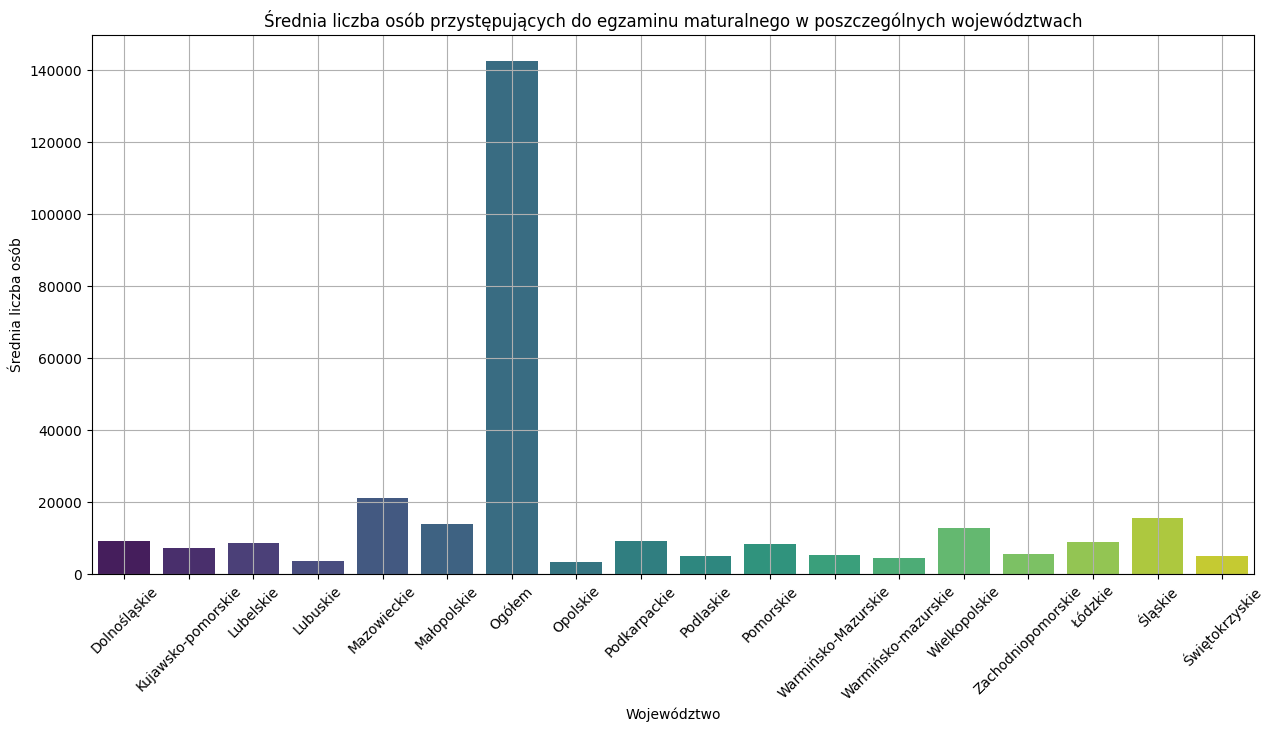

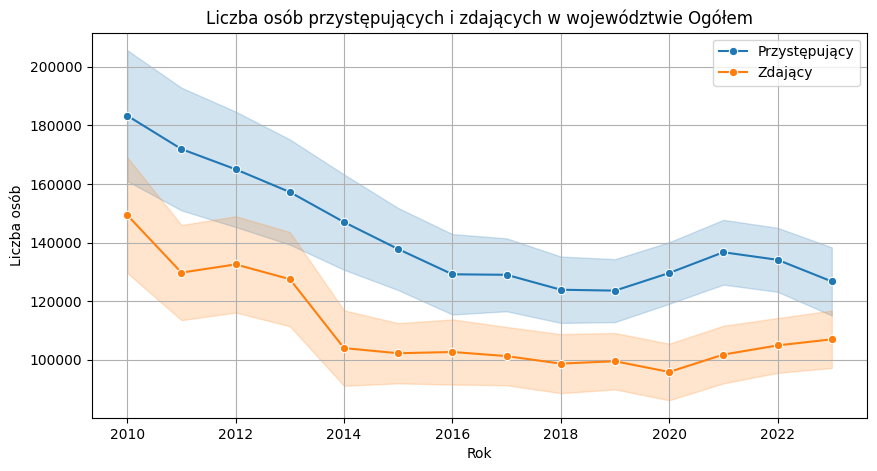

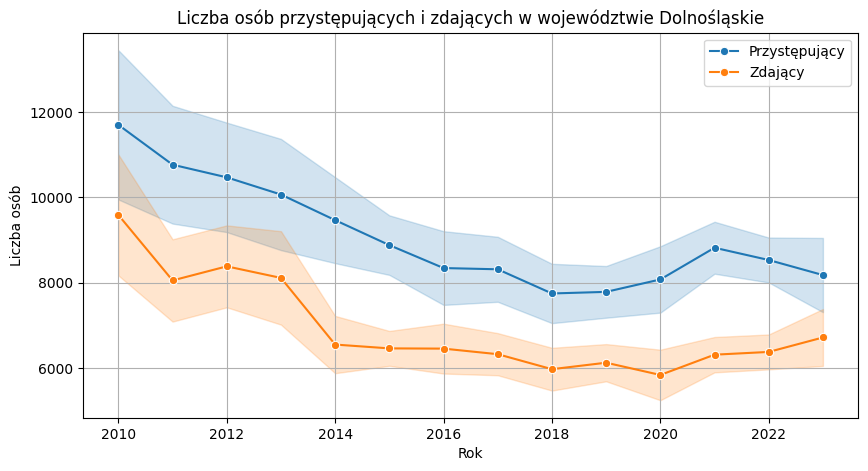

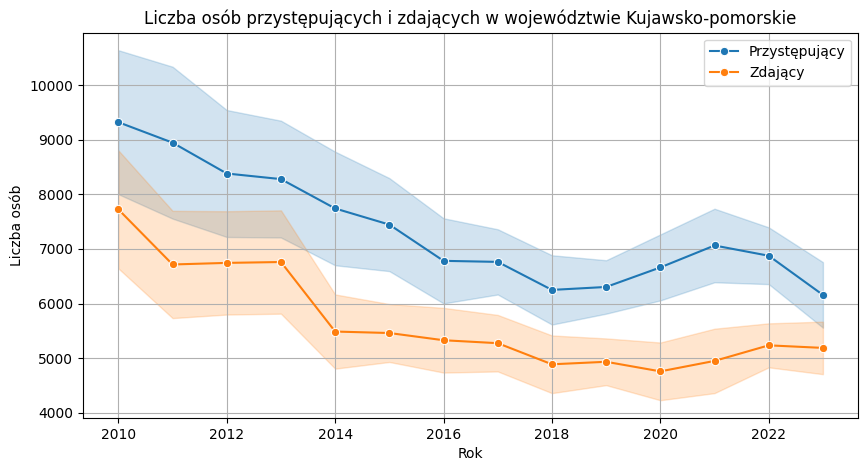

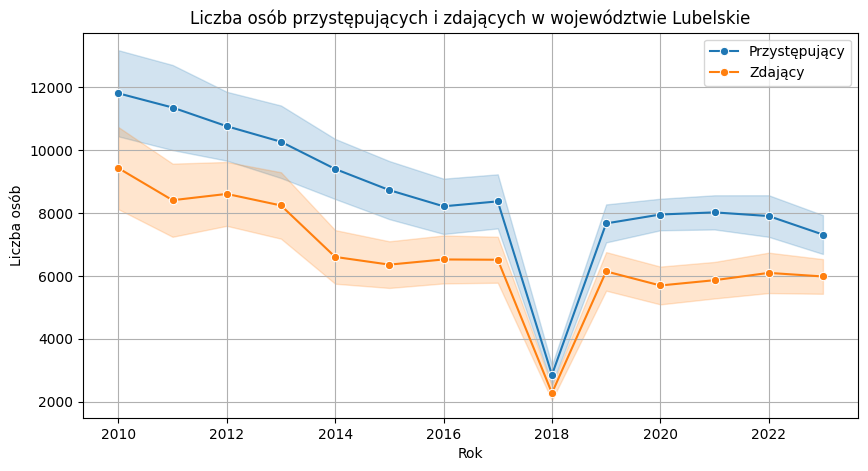

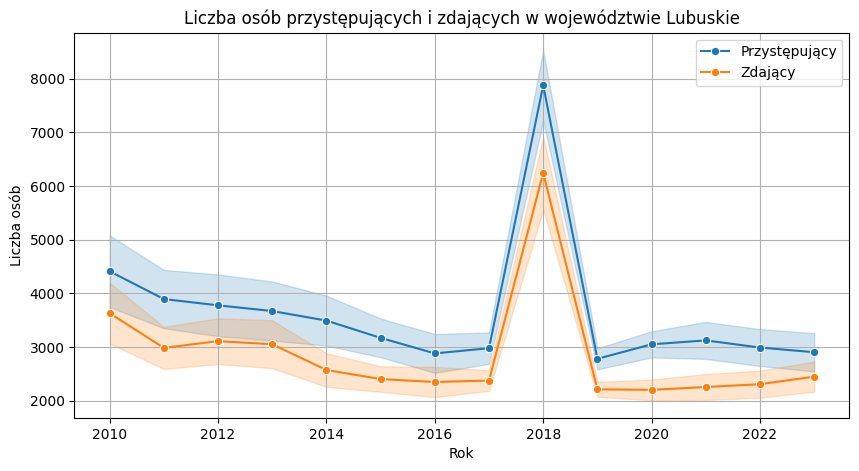

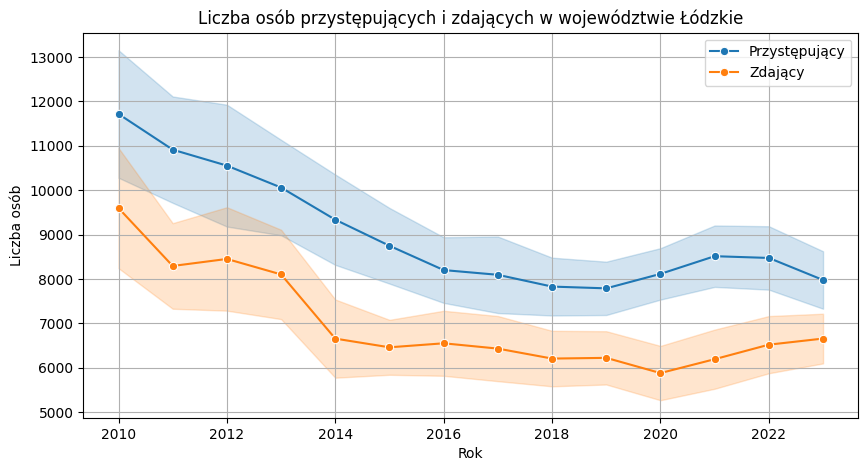

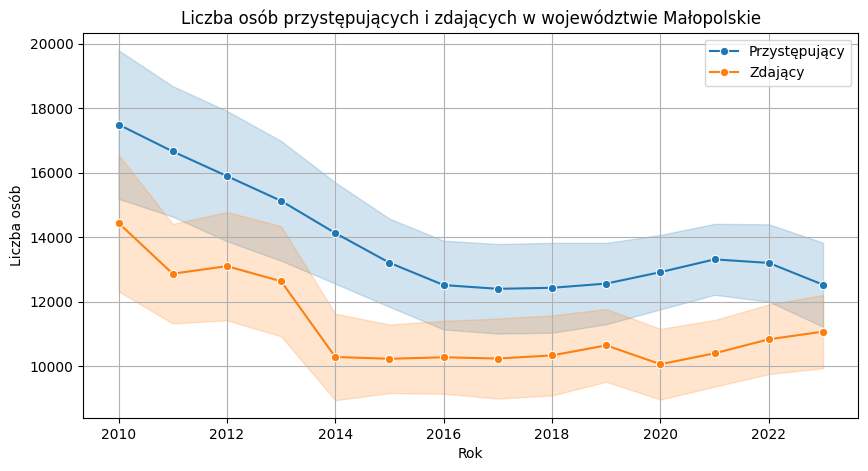

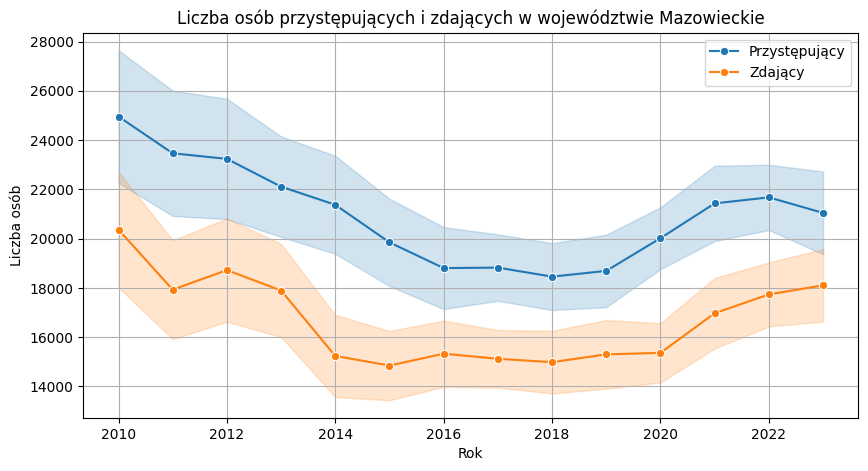

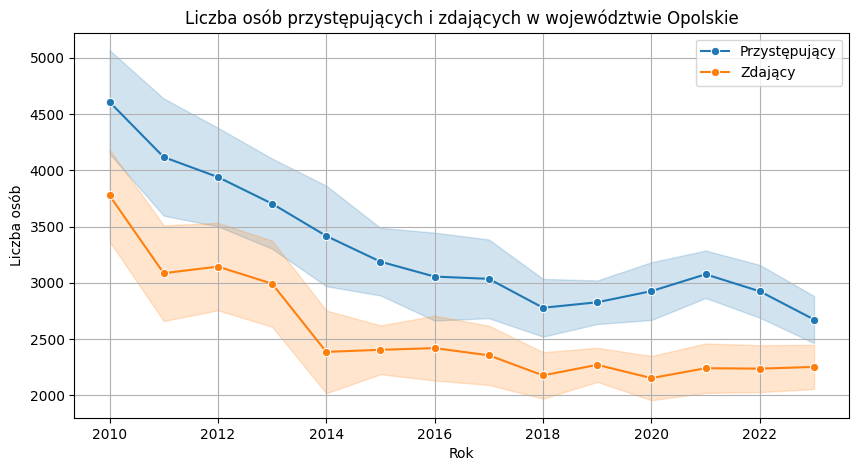

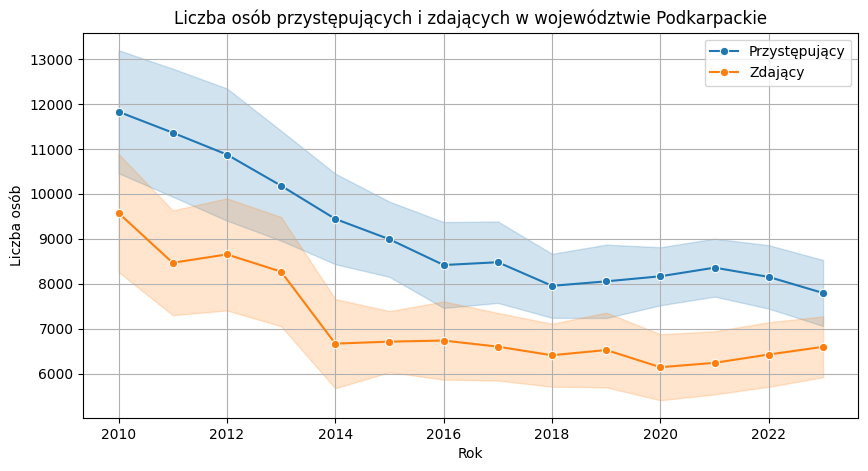

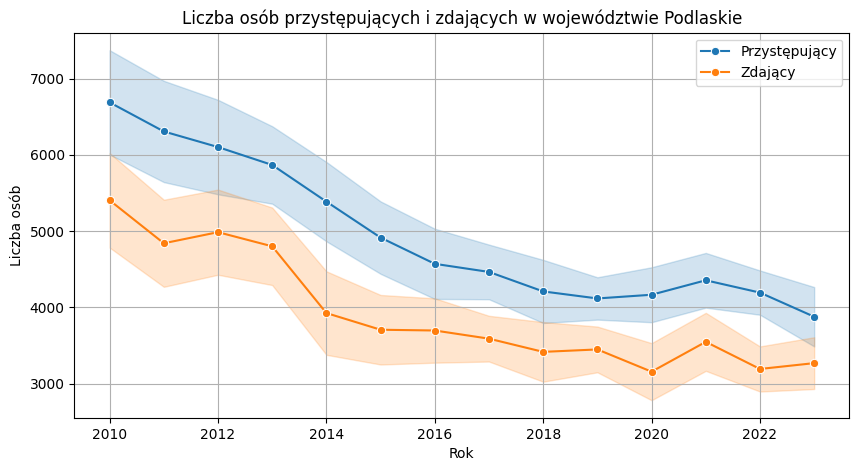

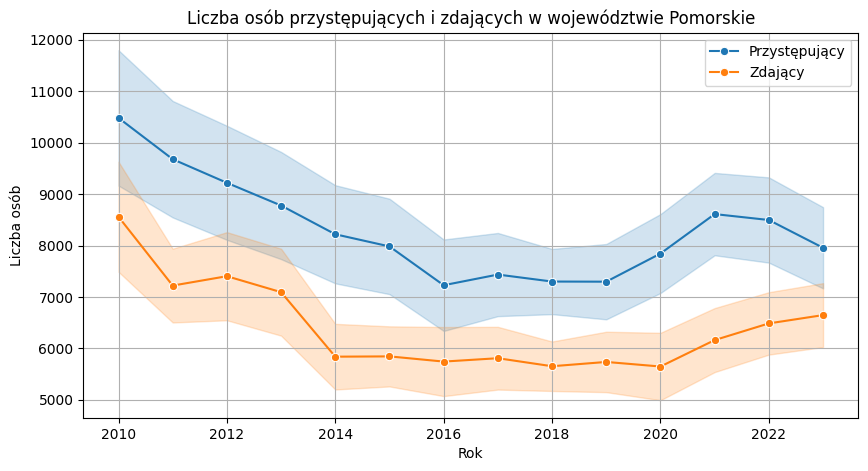

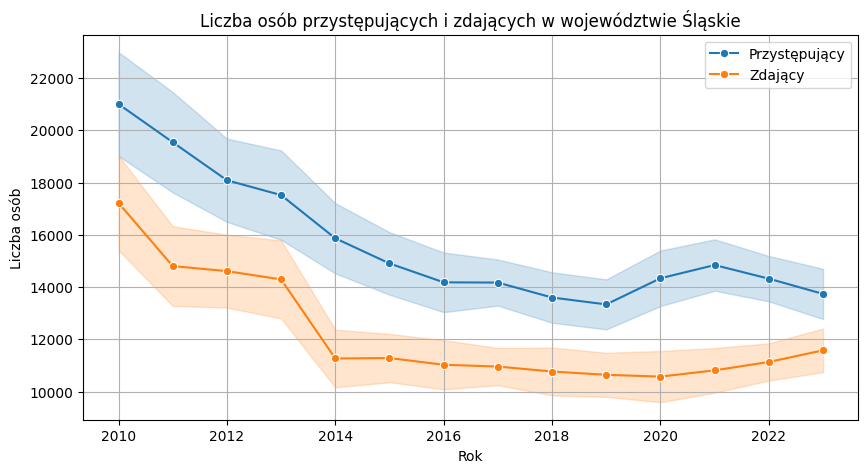

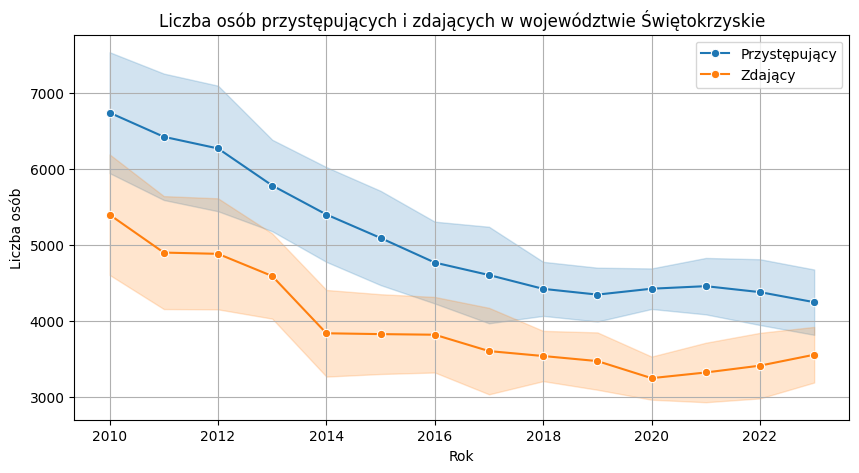

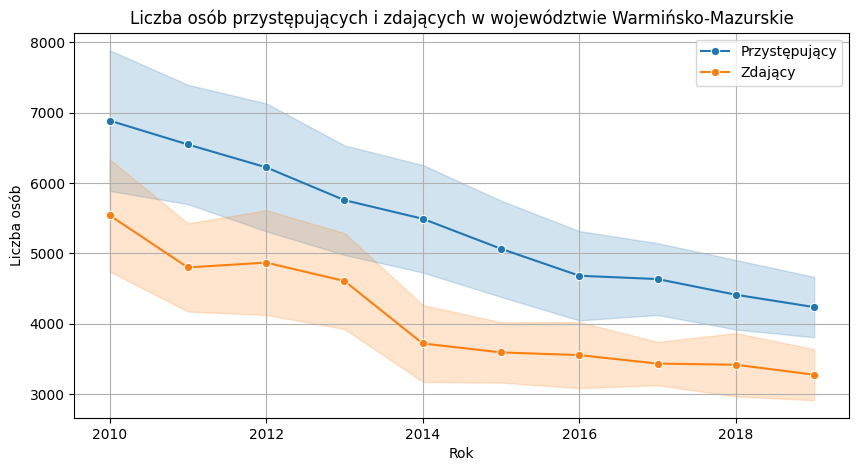

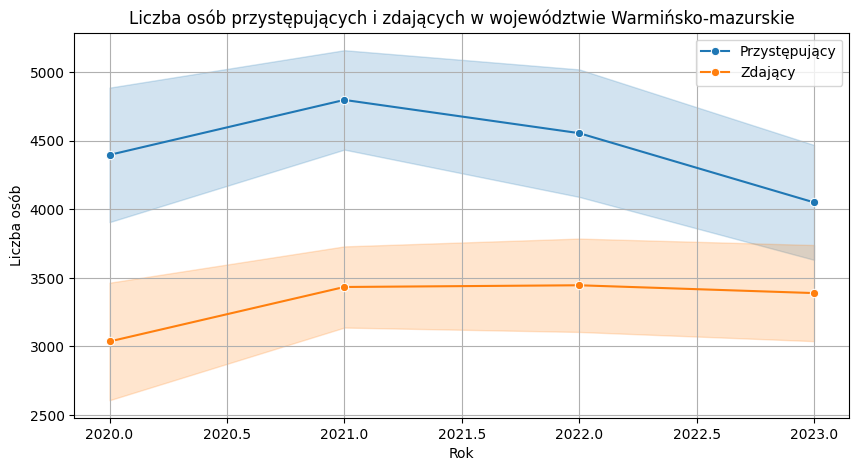

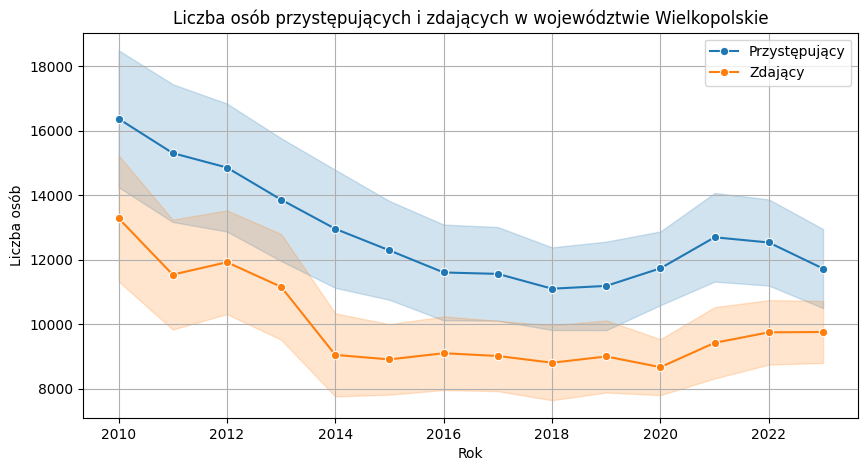

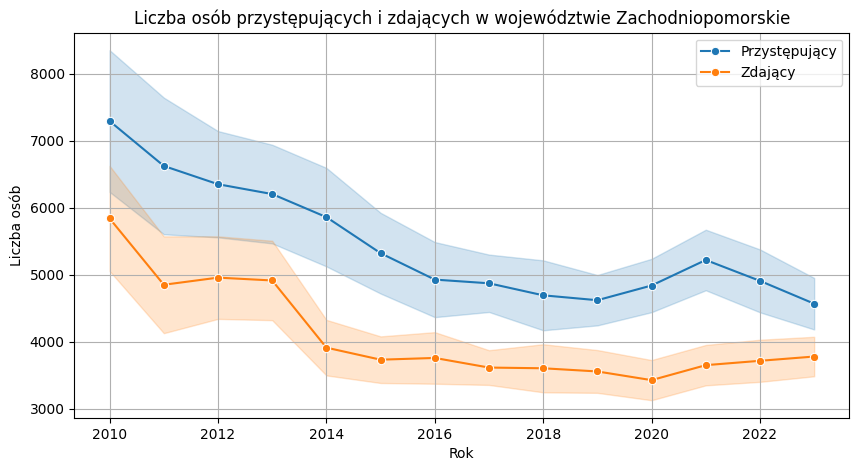

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Użycie surowego ciągu znaków (raw string) do ścieżki pliku CSV
file_path =  r'C:\Users\janek\Documents\dopa\WebsiteProject\BAZA\dane.csv'

# Wczytanie pliku CSV z odpowiednim separatorem
data = pd.read_csv(file_path, sep=';')

# Wyświetlenie kolumn i podgląd danych
print("Kolumny w danych:")
print(data.columns)

print("\nPodgląd danych:")
print(data.head())

# Konwersja kolumn do odpowiednich typów
data['wartosc'] = pd.to_numeric(data['wartosc'], errors='coerce')
data['rok'] = pd.to_numeric(data['rok'], errors='coerce')

# Usunięcie wierszy z brakującymi danymi
data = data.dropna(subset=['wartosc', 'rok'])

# Filtracja danych tylko dla przystępujących
przystepujacy = data[data['status_zdajacych'].str.contains('przystąpił', case=False, na=False)]

# Główny wykres: średnia liczba osób przystępujących do egzaminu w poszczególnych województwach
avg_values = przystepujacy.groupby('wojewodztwo')['wartosc'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(data=avg_values, x='wojewodztwo', y='wartosc', palette='viridis')
plt.title('Średnia liczba osób przystępujących do egzaminu maturalnego w poszczególnych województwach')
plt.xlabel('Województwo')
plt.ylabel('Średnia liczba osób')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tworzenie wykresów szczegółowych dla każdego województwa
wojewodztwa = data['wojewodztwo'].unique()

for wojewodztwo in wojewodztwa:
    # Dane dla wybranego województwa
    dane_wojewodztwo = data[data['wojewodztwo'] == wojewodztwo]

    # Wykres dla przystępujących
    przystepujacy_woj = dane_wojewodztwo[dane_wojewodztwo['status_zdajacych'].str.contains('przystąpił', case=False, na=False)]
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=przystepujacy_woj, x='rok', y='wartosc', marker='o', label='Przystępujący')
    
    # Wykres dla zdających
    zdajacy_woj = dane_wojewodztwo[dane_wojewodztwo['status_zdajacych'].str.contains('zdał', case=False, na=False)]
    
    sns.lineplot(data=zdajacy_woj, x='rok', y='wartosc', marker='o', label='Zdający')
    
    plt.title(f'Liczba osób przystępujących i zdających w województwie {wojewodztwo}')
    plt.xlabel('Rok')
    plt.ylabel('Liczba osób')
    plt.legend()
    plt.grid(True)
    plt.show()


C:\Users\janek\AppData\Local\Temp\ipykernel_15876\772167290.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_values, x='wojewodztwo', y='wartosc', palette='viridis')


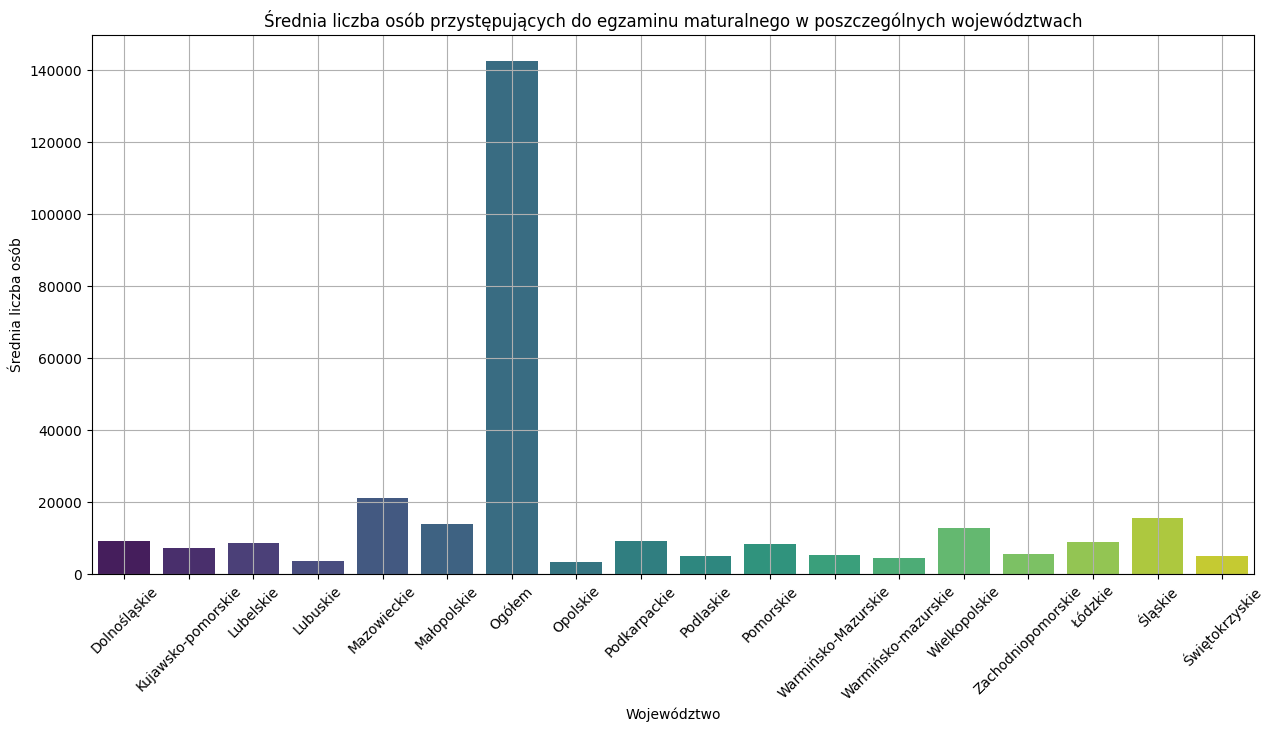

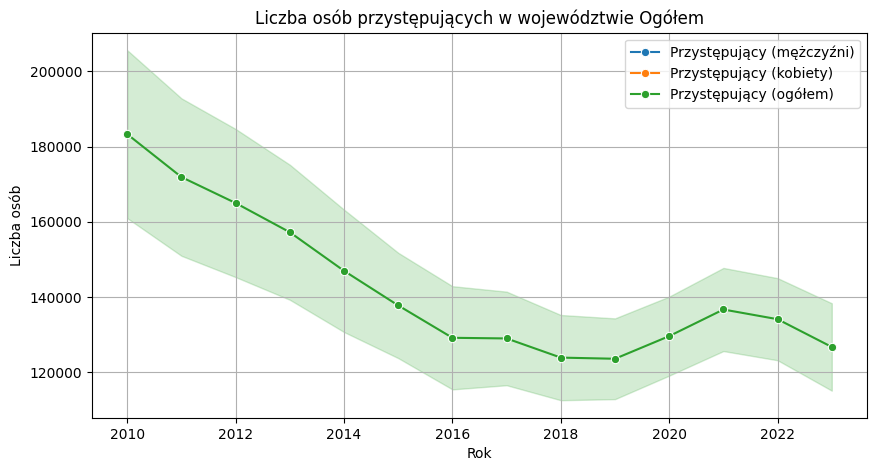

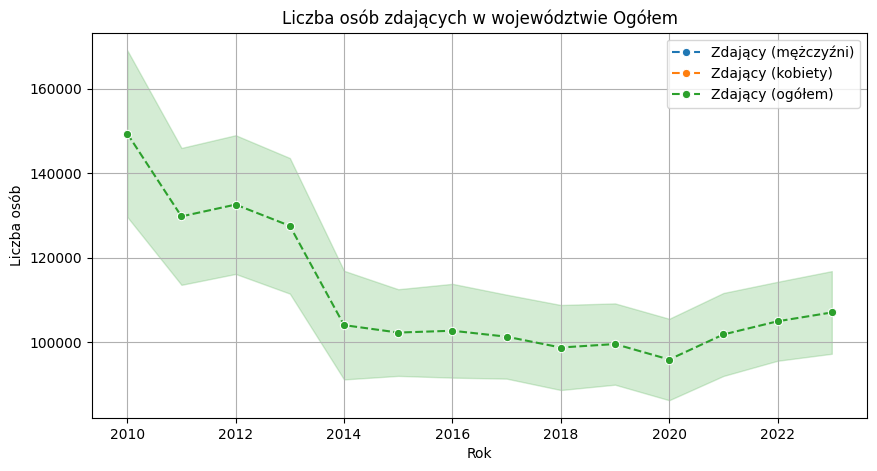

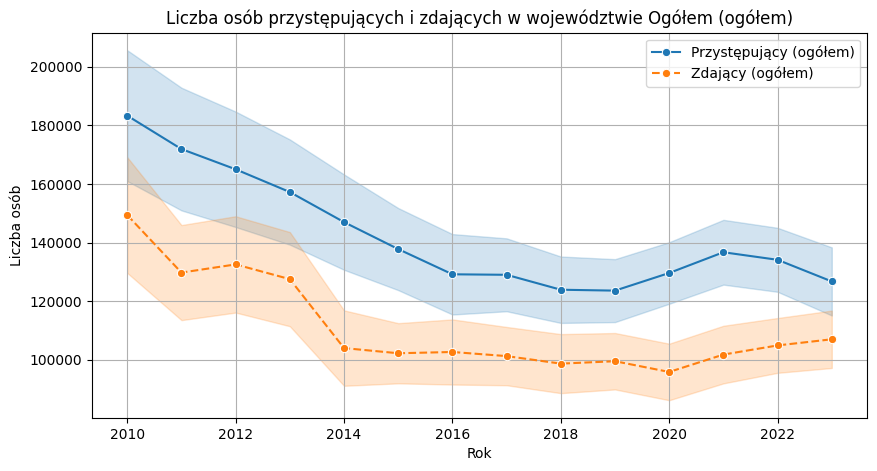

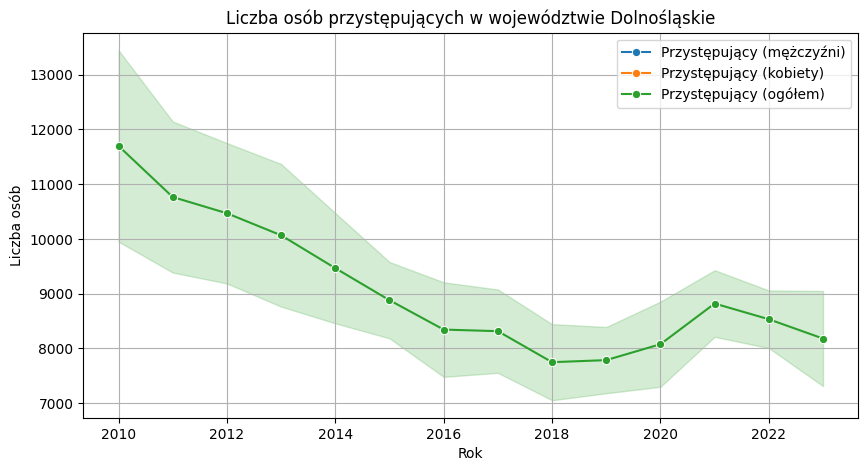

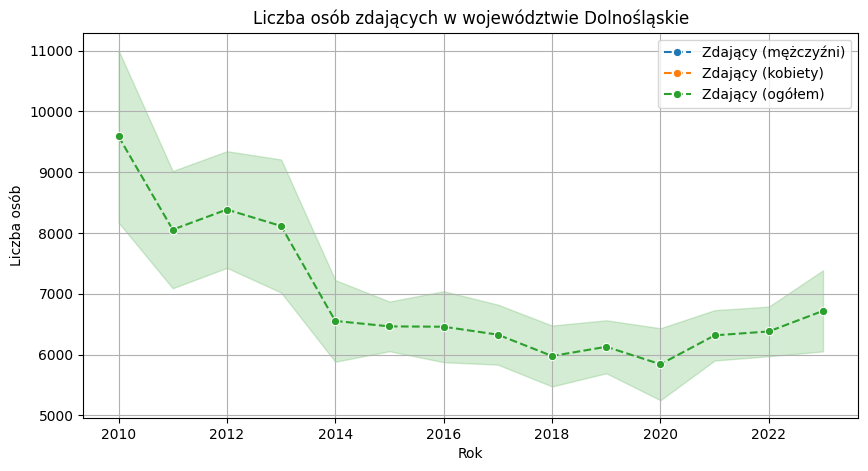

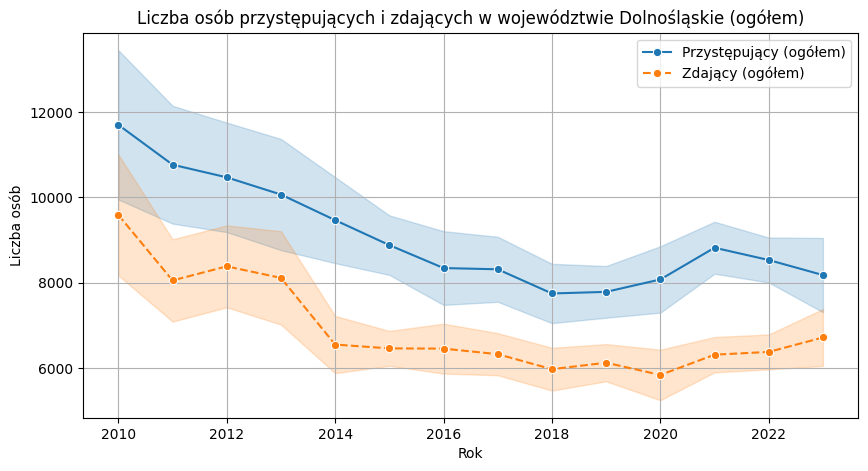

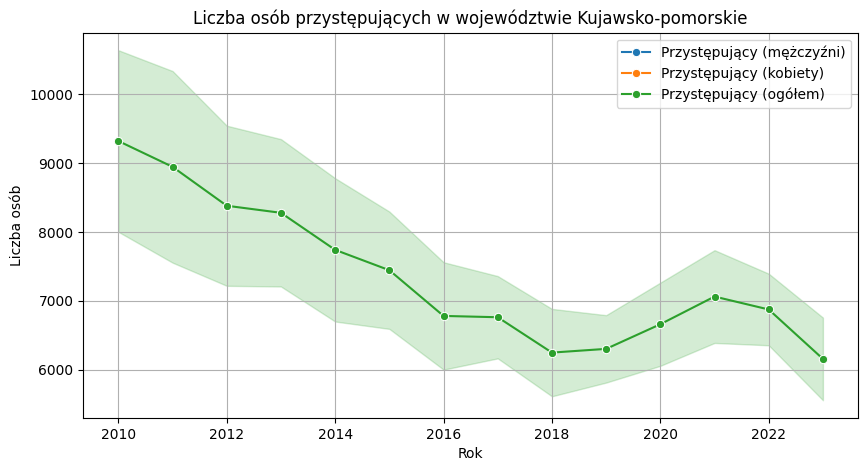

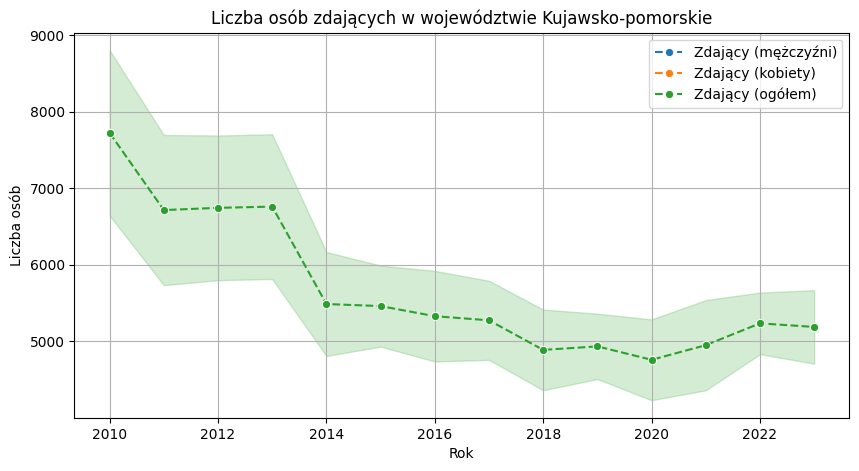

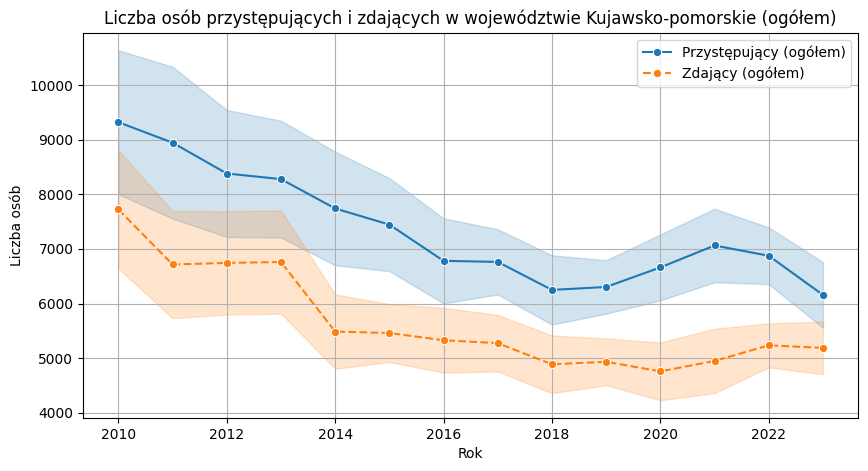

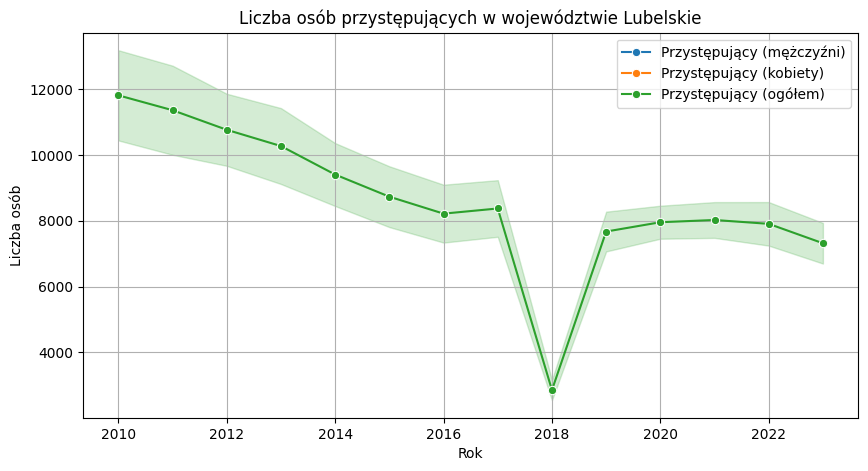

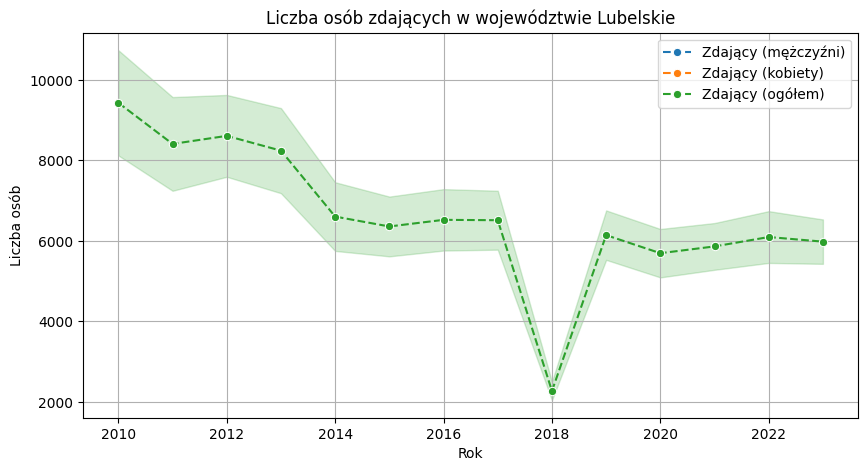

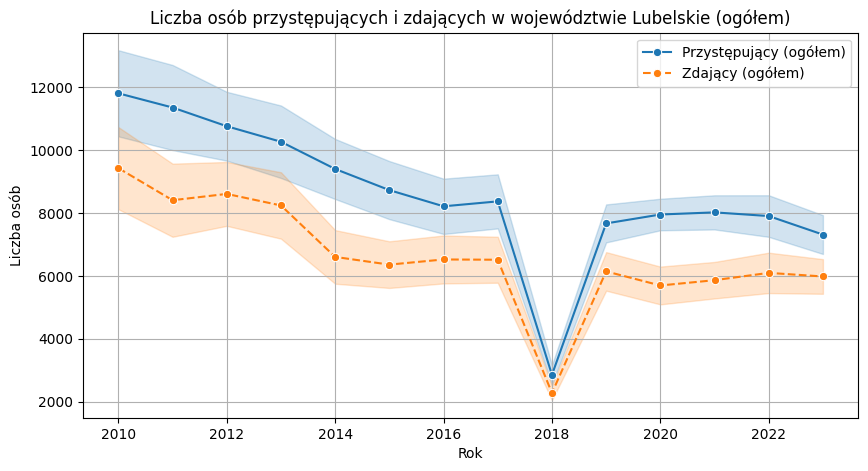

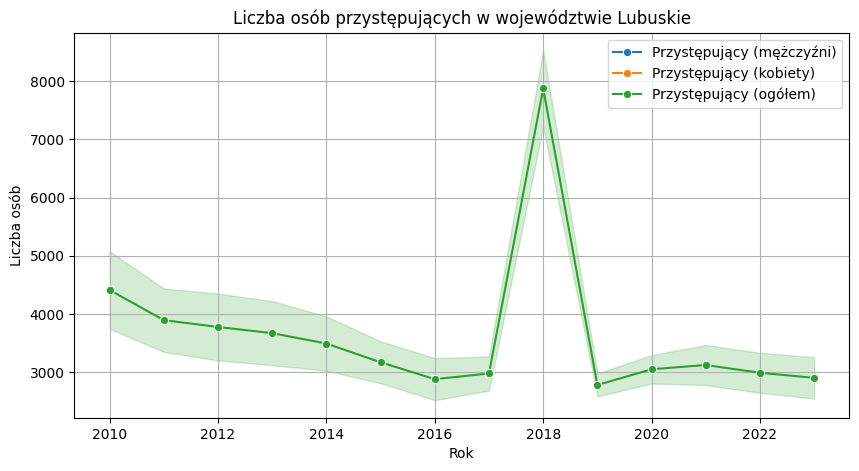

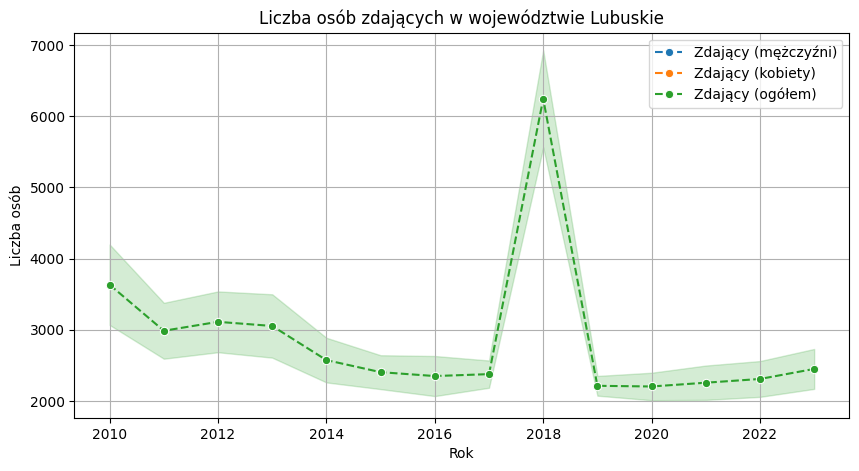

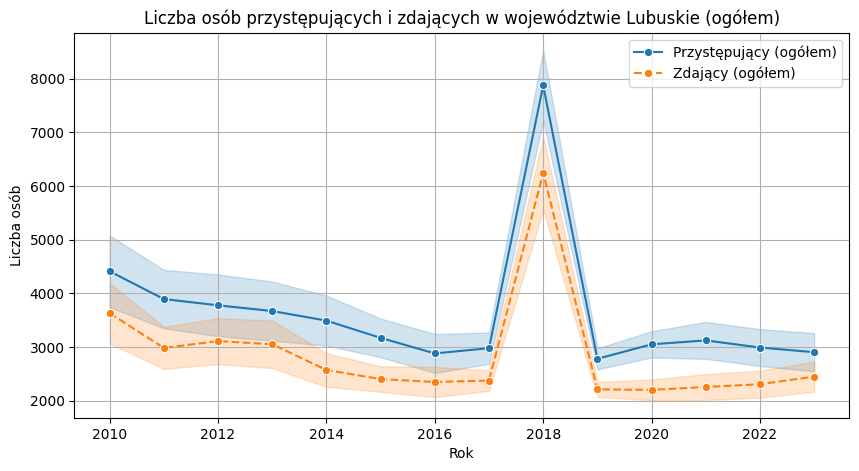

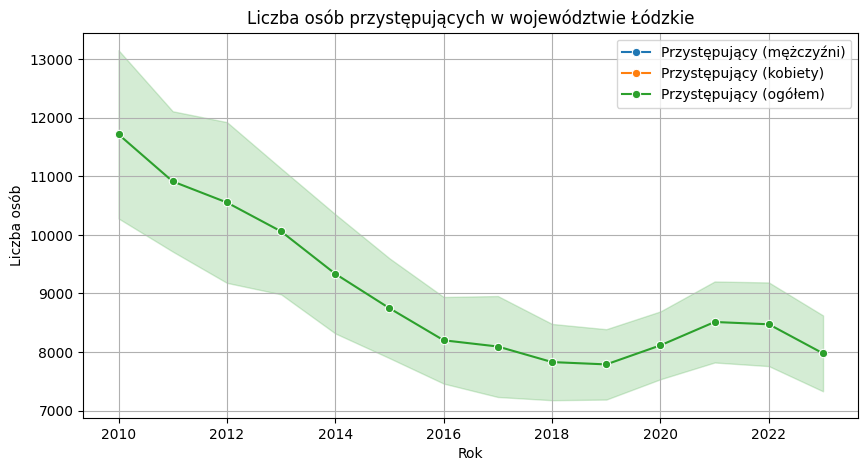

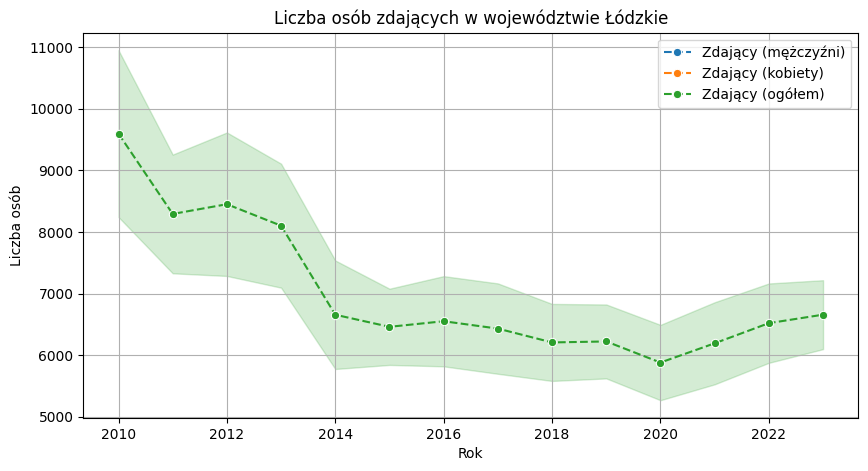

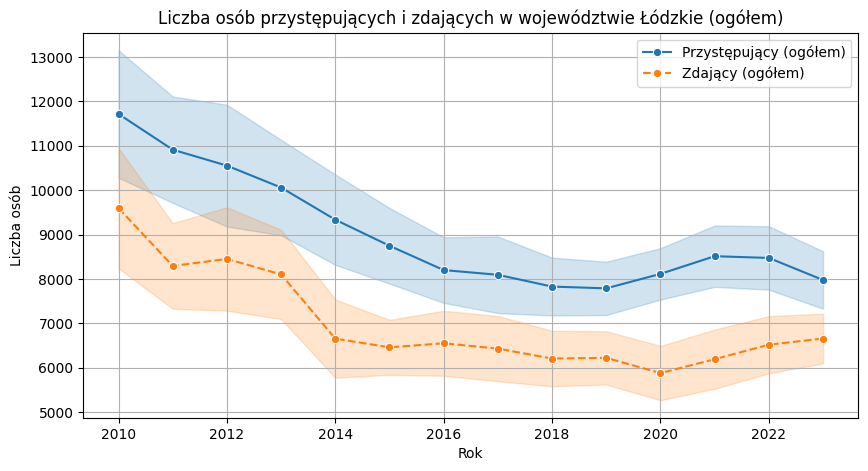

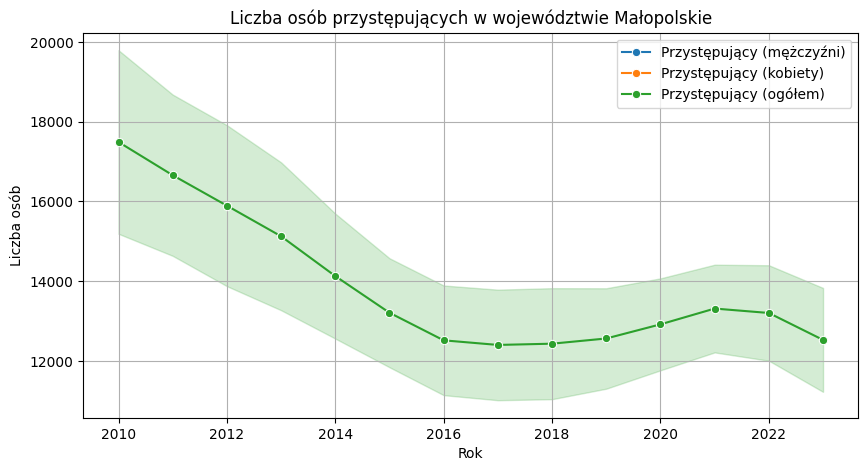

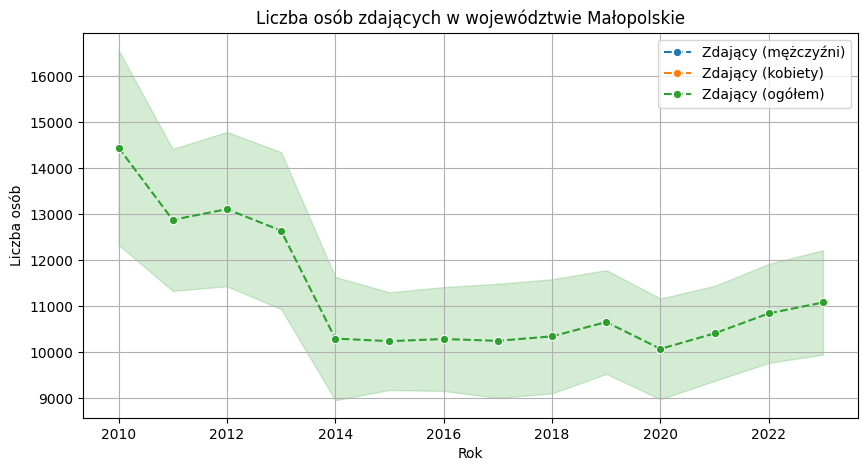

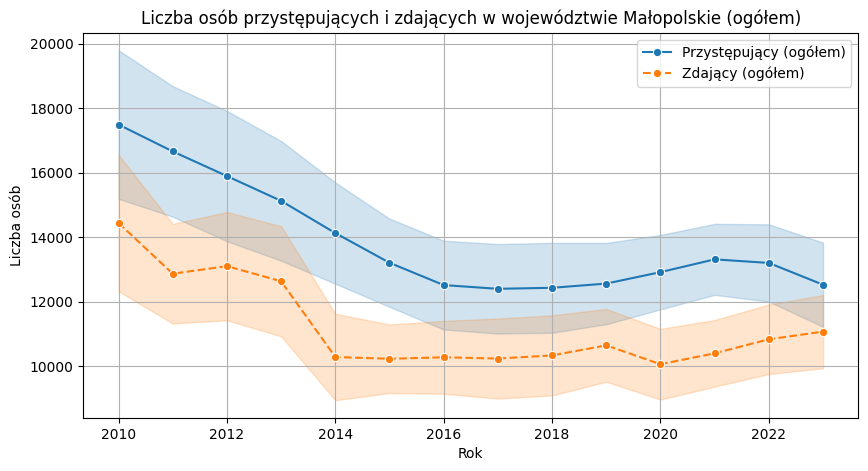

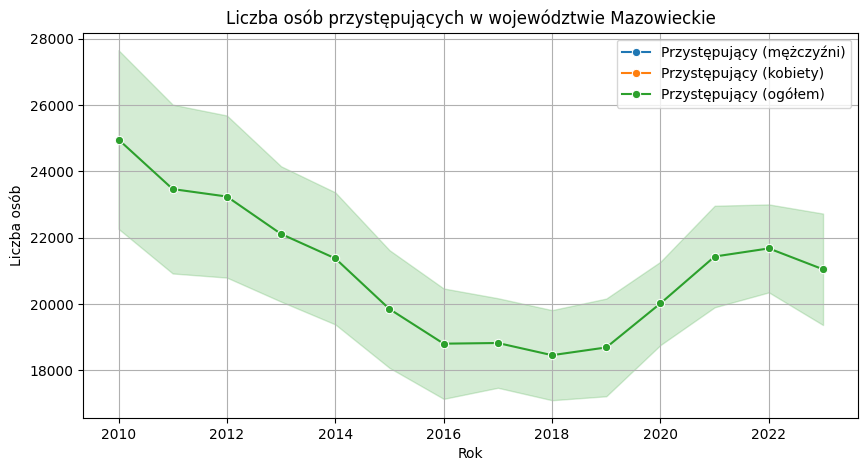

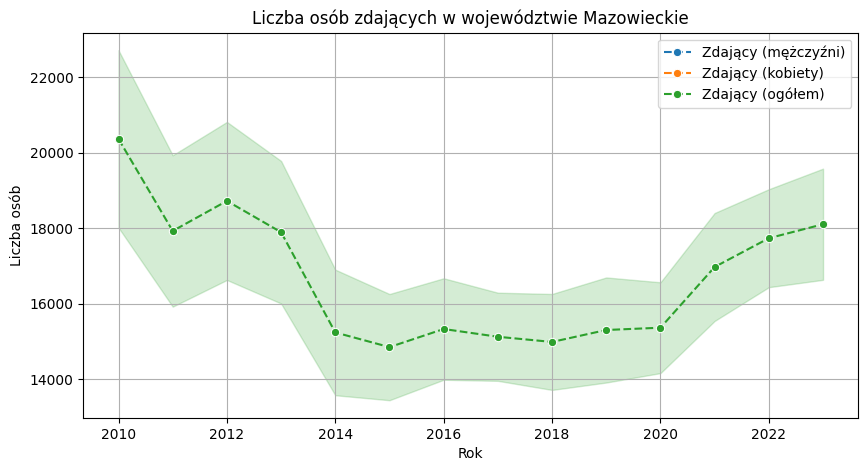

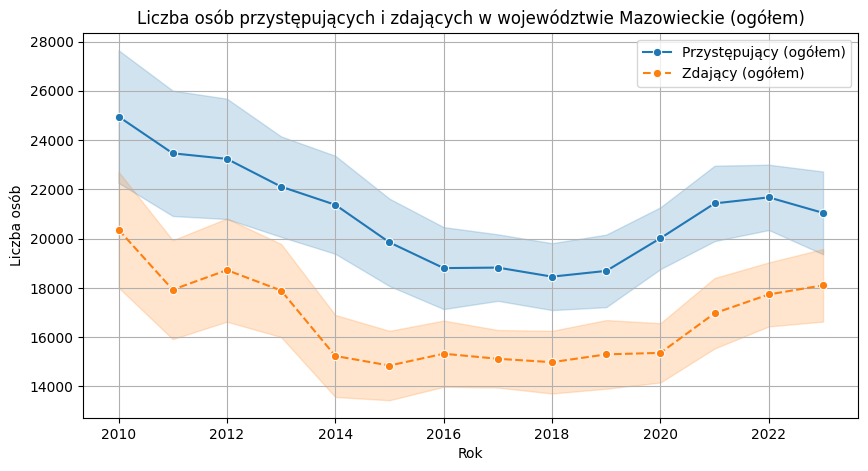

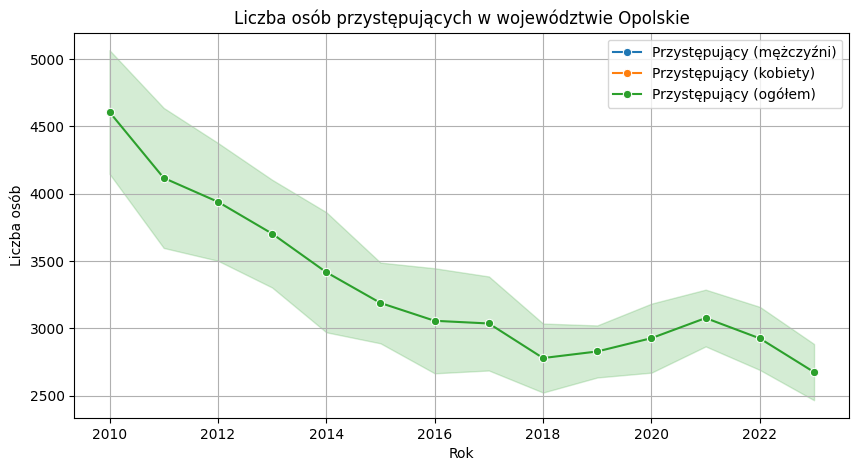

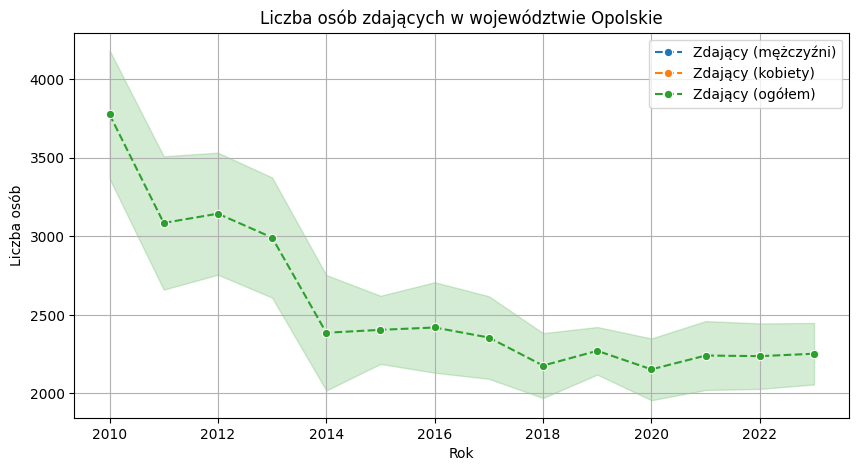

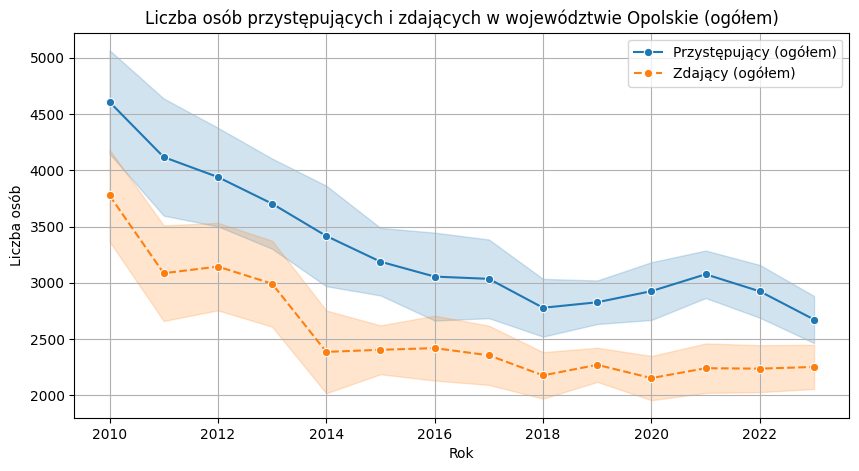

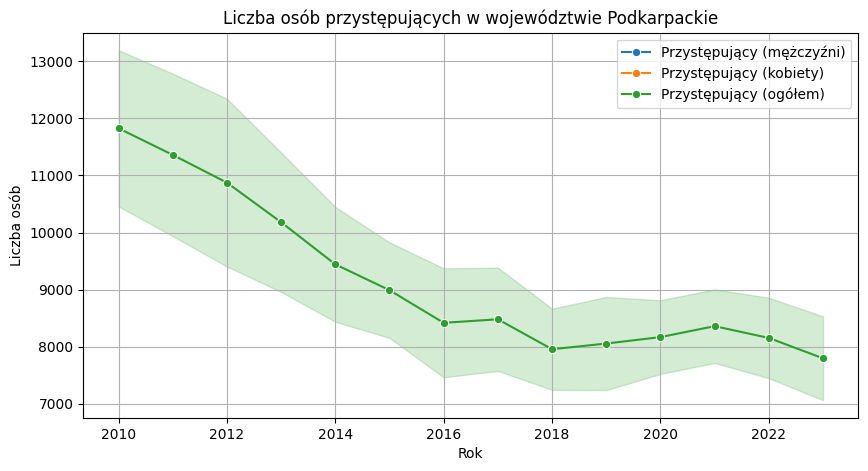

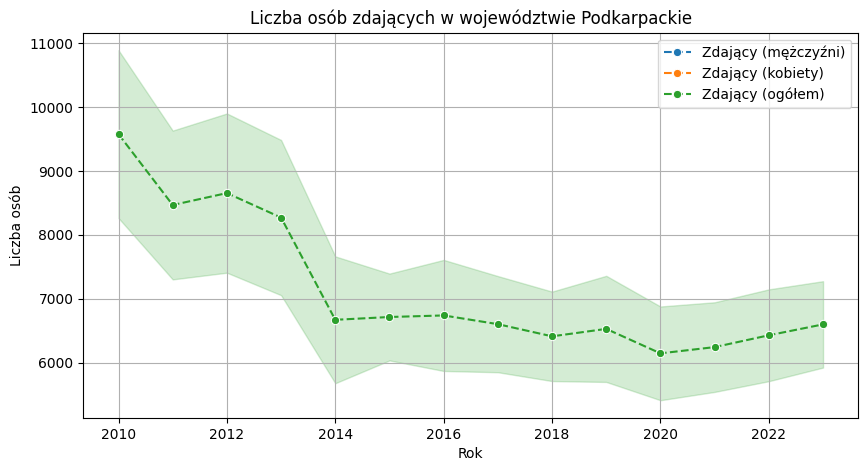

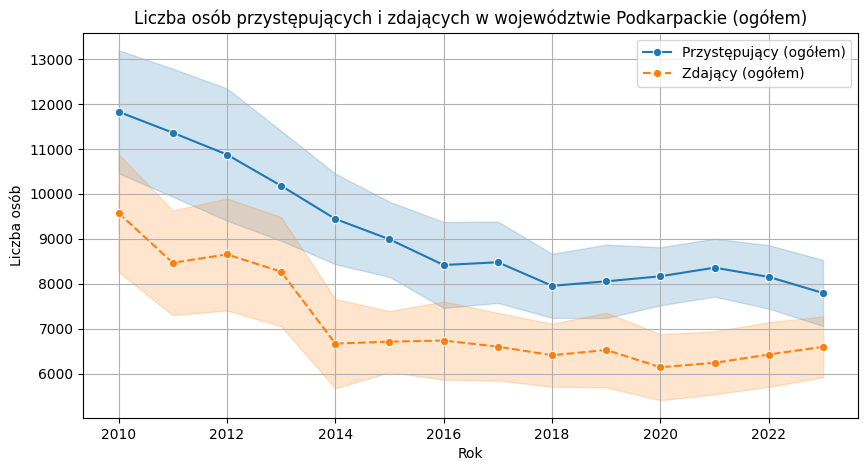

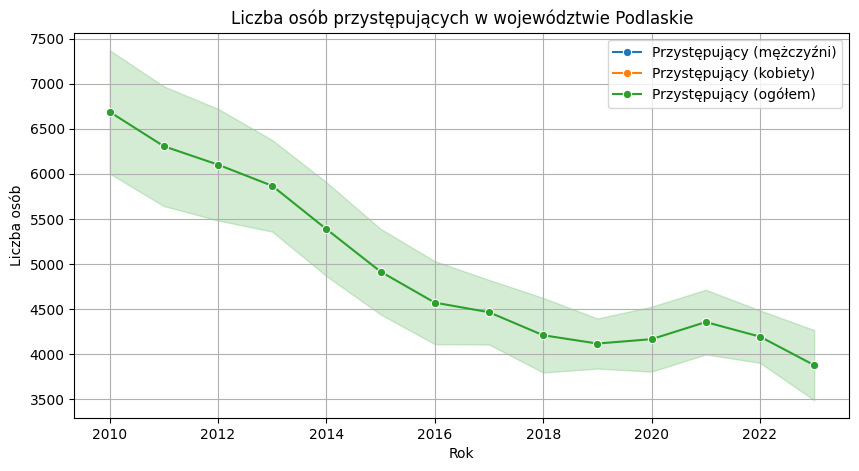

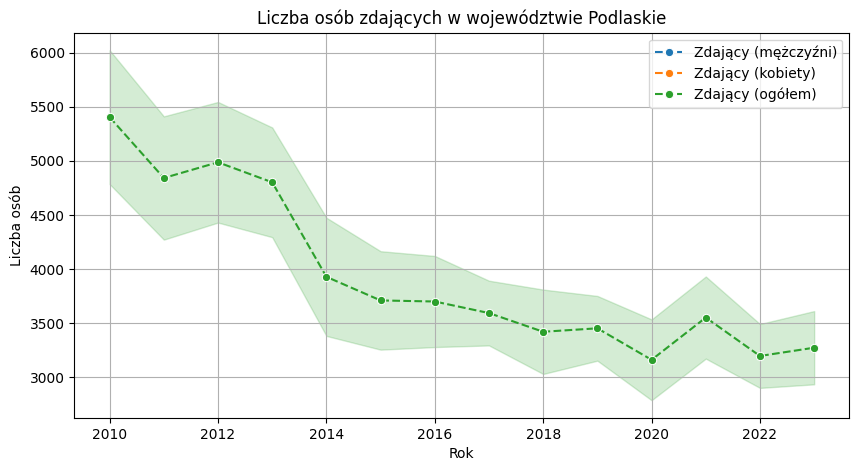

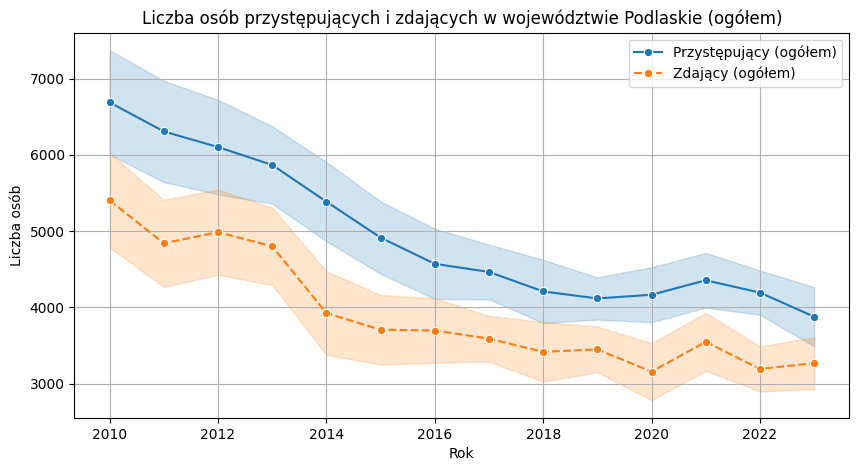

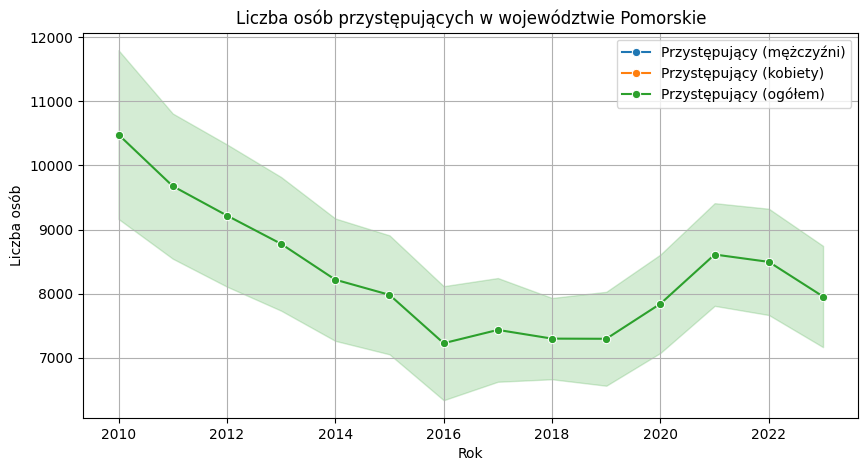

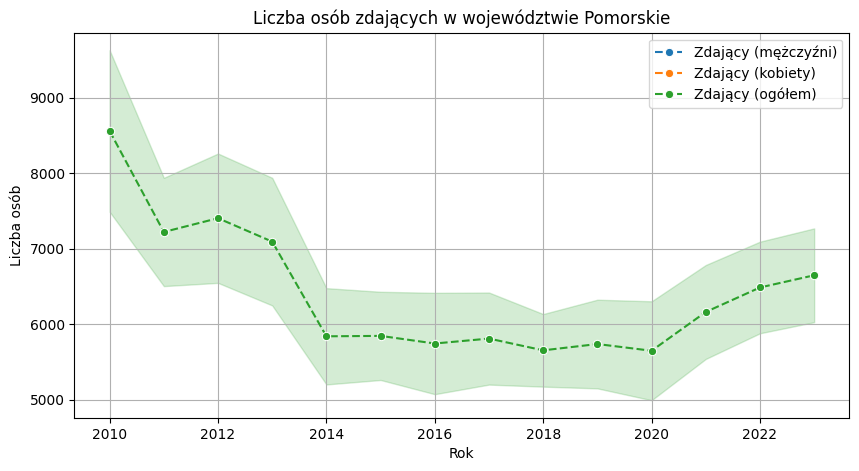

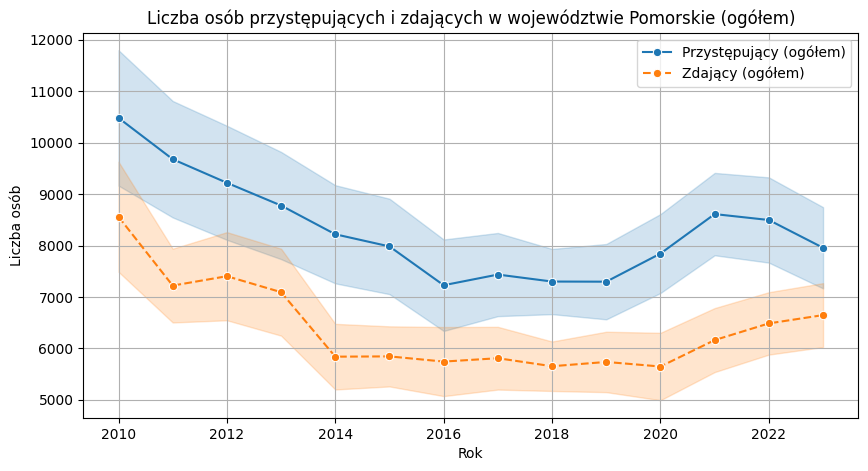

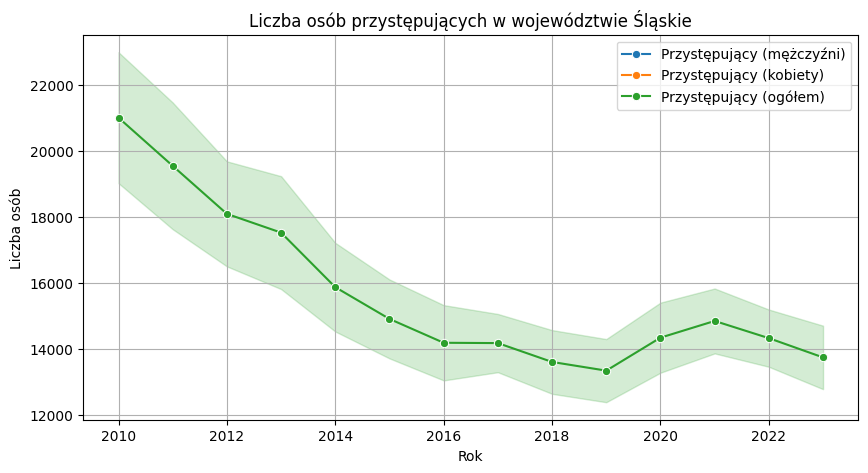

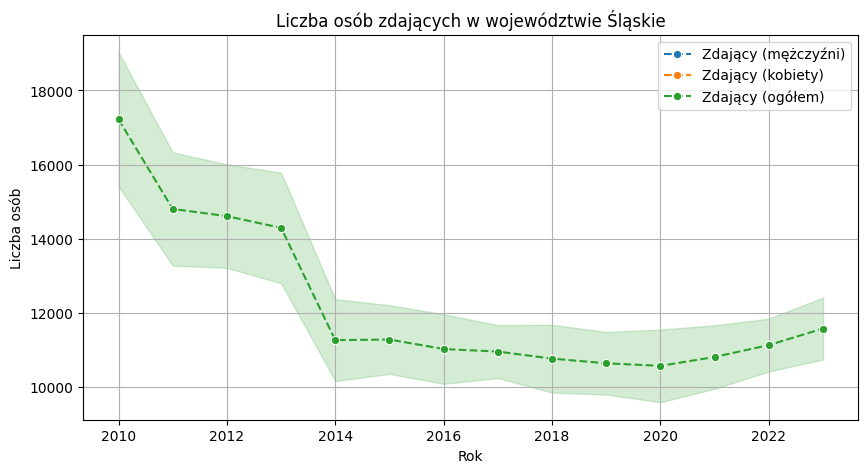

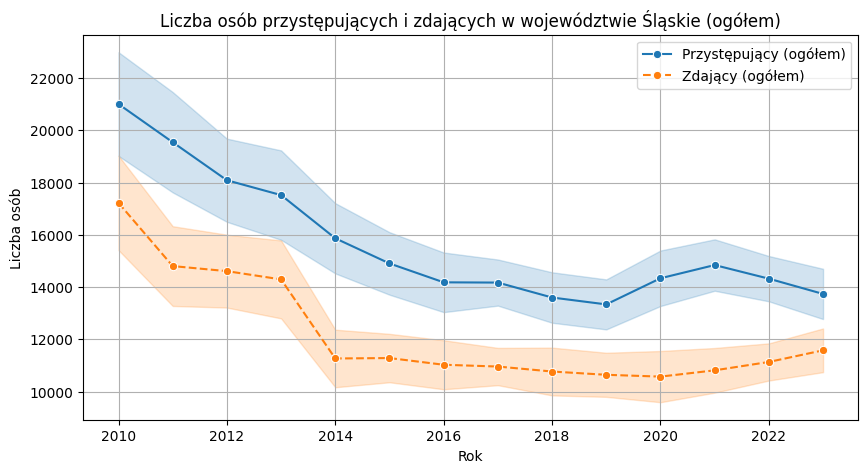

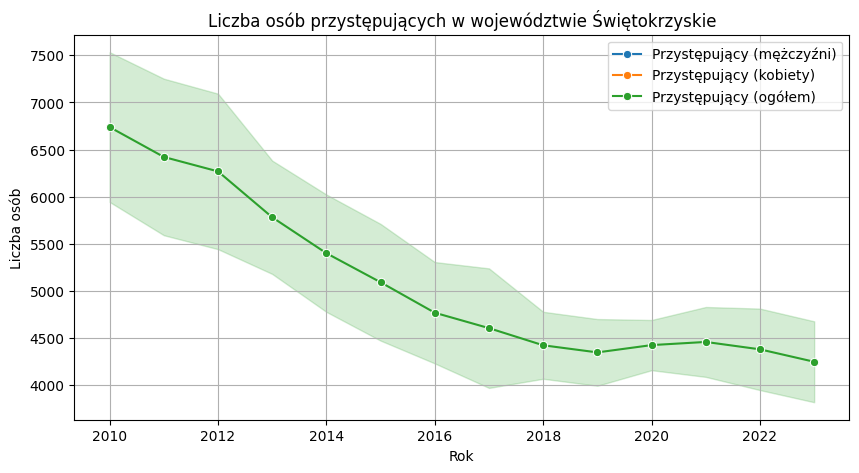

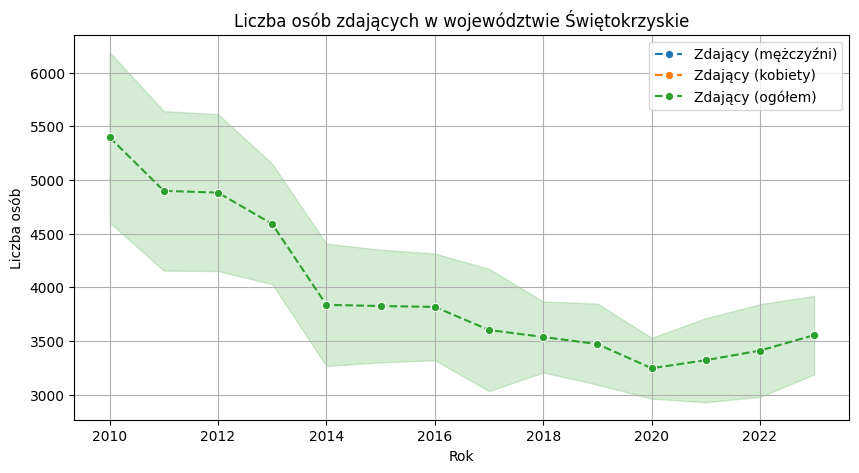

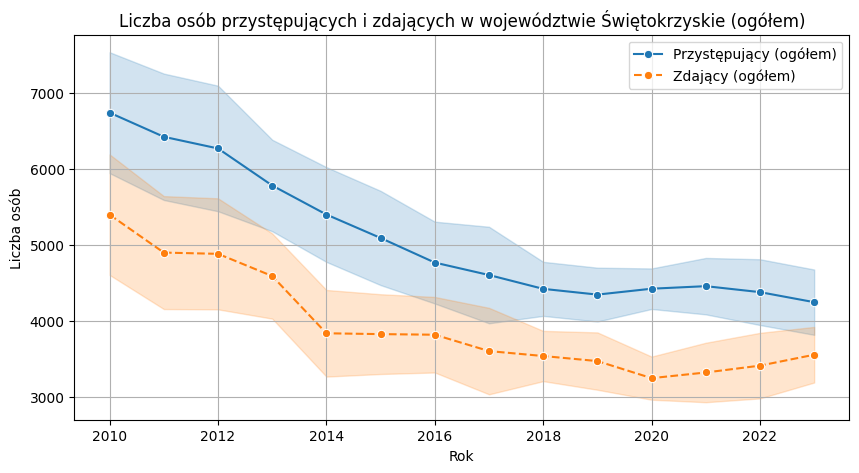

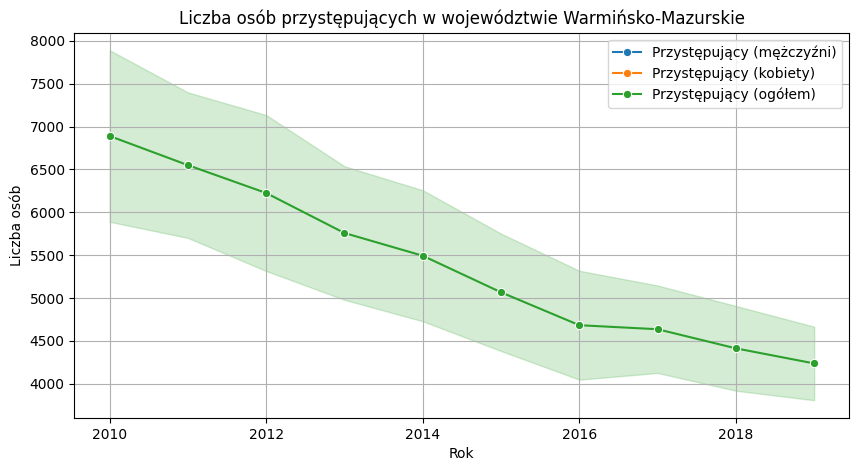

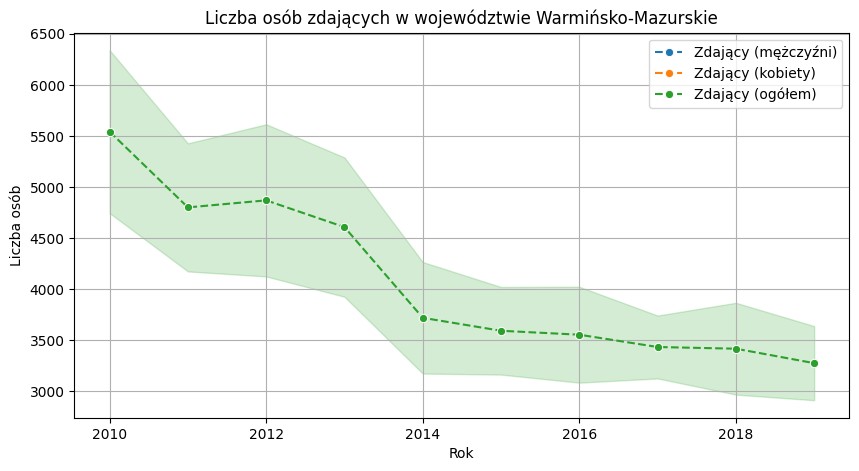

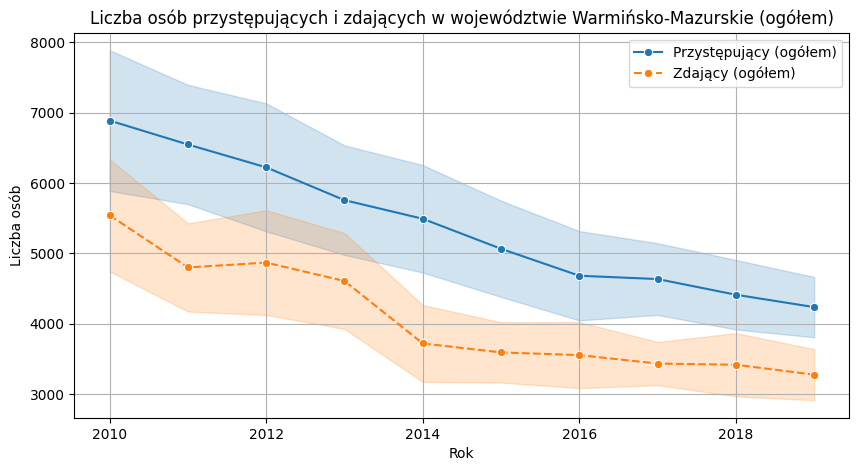

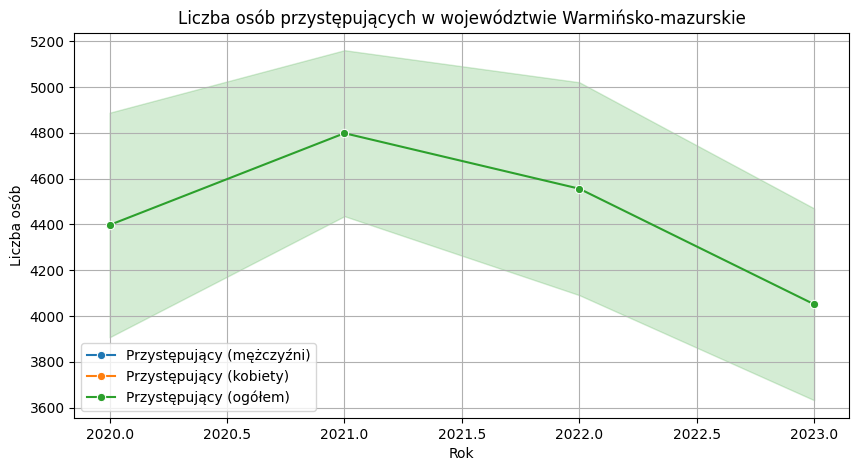

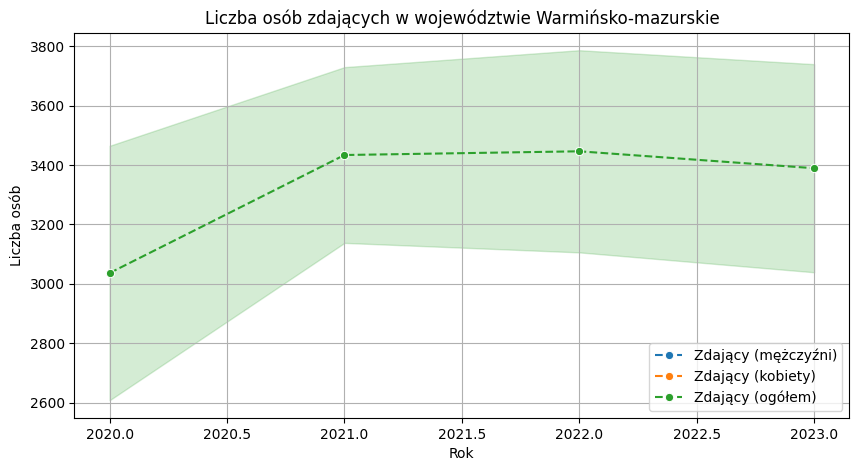

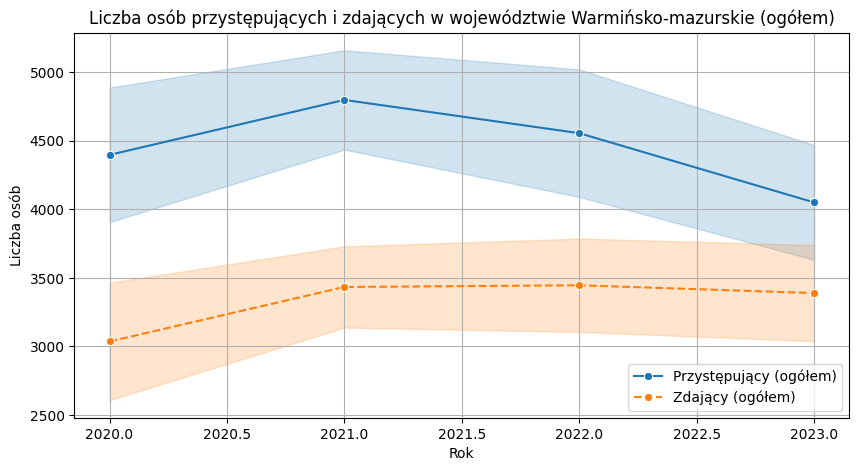

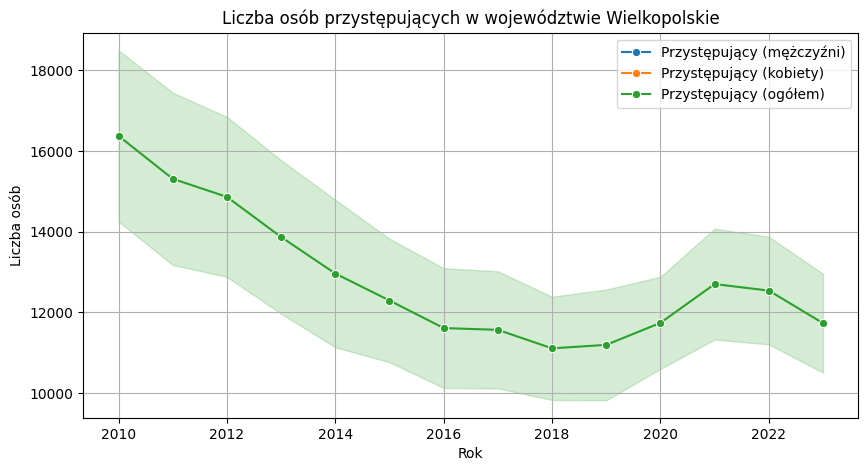

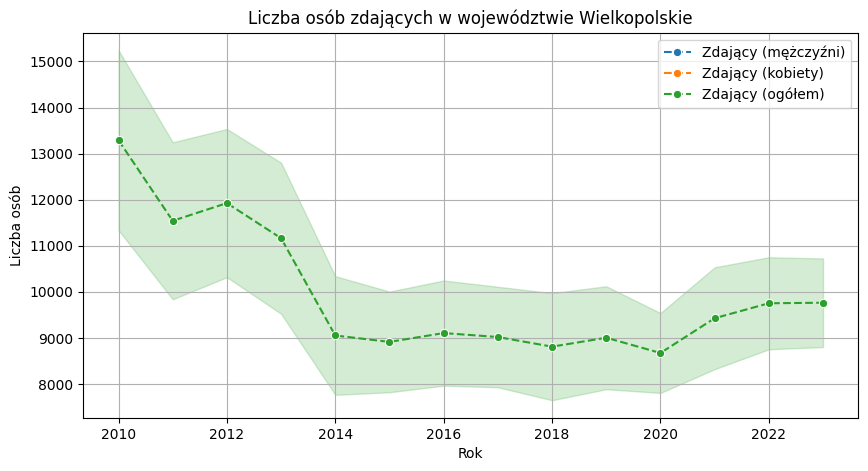

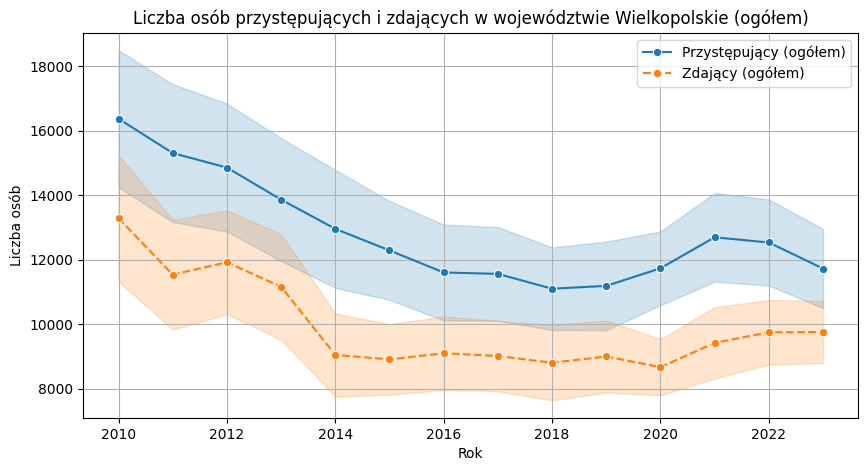

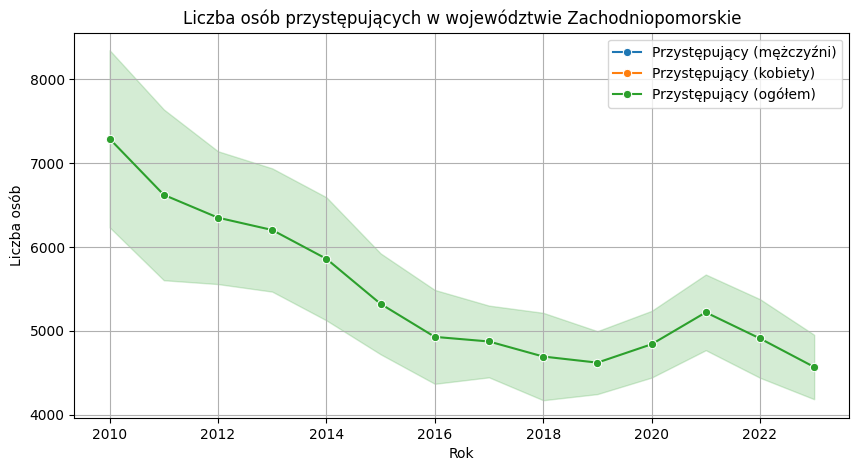

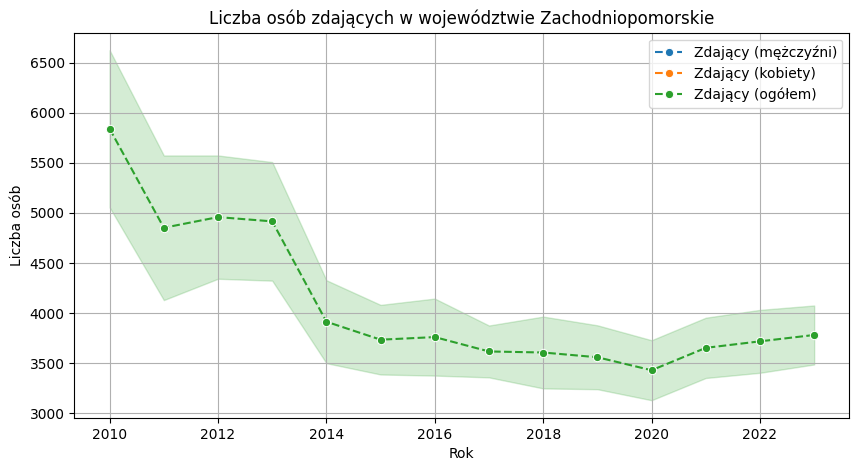

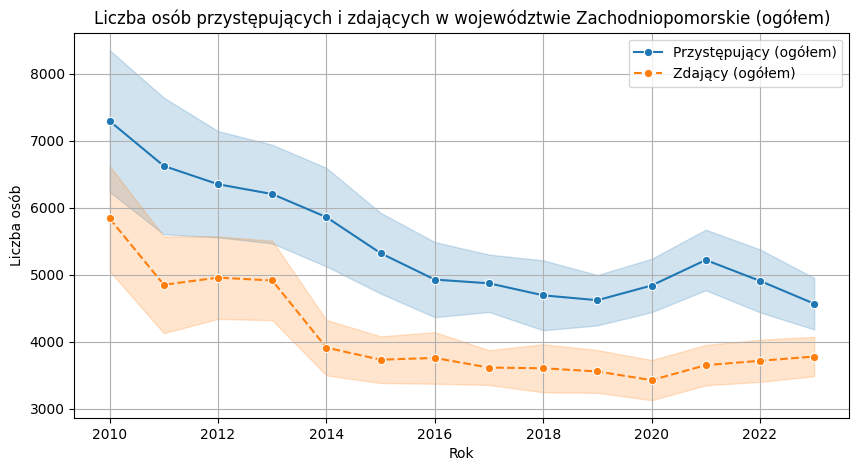

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Użycie surowego ciągu znaków (raw string) do ścieżki pliku CSV
file_path = r'C:\Users\janek\Documents\dopa\WebsiteProject\BAZA\dane.csv'

# Wczytanie pliku CSV z odpowiednim separatorem
data = pd.read_csv(file_path, sep=';')

# Konwersja kolumn do odpowiednich typów
data['wartosc'] = pd.to_numeric(data['wartosc'], errors='coerce')
data['rok'] = pd.to_numeric(data['rok'], errors='coerce')

# Usunięcie wierszy z brakującymi danymi
data = data.dropna(subset=['wartosc', 'rok'])

# Filtracja danych tylko dla przystępujących i zdających
przystepujacy = data[data['status_zdajacych'].str.contains('przystąpił', case=False, na=False)]
zdajacy = data[data['status_zdajacych'].str.contains('zdał', case=False, na=False)]

# Główny wykres: średnia liczba osób przystępujących do egzaminu w poszczególnych województwach
avg_values = przystepujacy.groupby('wojewodztwo')['wartosc'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(data=avg_values, x='wojewodztwo', y='wartosc', palette='viridis')
plt.title('Średnia liczba osób przystępujących do egzaminu maturalnego w poszczególnych województwach')
plt.xlabel('Województwo')
plt.ylabel('Średnia liczba osób')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tworzenie wykresów szczegółowych dla każdego województwa
wojewodztwa = data['wojewodztwo'].unique()

for wojewodztwo in wojewodztwa:
    # Dane dla wybranego województwa
    dane_wojewodztwo_przyst = przystepujacy[przystepujacy['wojewodztwo'] == wojewodztwo]
    dane_wojewodztwo_zdaj = zdajacy[zdajacy['wojewodztwo'] == wojewodztwo]
    
    # Grupowanie danych według płci (jeśli istnieje taka kolumna w danych)
    if 'plec' in data.columns:
        dane_wojewodztwo_przyst_m = dane_wojewodztwo_przyst[dane_wojewodztwo_przyst['plec'] == 'mężczyzna']
        dane_wojewodztwo_przyst_k = dane_wojewodztwo_przyst[dane_wojewodztwo_przyst['plec'] == 'kobieta']
        dane_wojewodztwo_zdaj_m = dane_wojewodztwo_zdaj[dane_wojewodztwo_zdaj['plec'] == 'mężczyzna']
        dane_wojewodztwo_zdaj_k = dane_wojewodztwo_zdaj[dane_wojewodztwo_zdaj['plec'] == 'kobieta']
    else:
        dane_wojewodztwo_przyst_m = dane_wojewodztwo_przyst
        dane_wojewodztwo_przyst_k = dane_wojewodztwo_przyst
        dane_wojewodztwo_zdaj_m = dane_wojewodztwo_zdaj
        dane_wojewodztwo_zdaj_k = dane_wojewodztwo_zdaj
    
    # Tworzenie wykresu dla przystępujących
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=dane_wojewodztwo_przyst_m, x='rok', y='wartosc', marker='o', label='Przystępujący (mężczyźni)')
    sns.lineplot(data=dane_wojewodztwo_przyst_k, x='rok', y='wartosc', marker='o', label='Przystępujący (kobiety)')
    sns.lineplot(data=dane_wojewodztwo_przyst, x='rok', y='wartosc', marker='o', label='Przystępujący (ogółem)')
    plt.title(f'Liczba osób przystępujących w województwie {wojewodztwo}')
    plt.xlabel('Rok')
    plt.ylabel('Liczba osób')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Tworzenie wykresu dla zdających
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=dane_wojewodztwo_zdaj_m, x='rok', y='wartosc', marker='o', linestyle='--', label='Zdający (mężczyźni)')
    sns.lineplot(data=dane_wojewodztwo_zdaj_k, x='rok', y='wartosc', marker='o', linestyle='--', label='Zdający (kobiety)')
    sns.lineplot(data=dane_wojewodztwo_zdaj, x='rok', y='wartosc', marker='o', linestyle='--', label='Zdający (ogółem)')
    plt.title(f'Liczba osób zdających w województwie {wojewodztwo}')
    plt.xlabel('Rok')
    plt.ylabel('Liczba osób')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Wykres ogólny (bez podziału na płeć)
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=dane_wojewodztwo_przyst, x='rok', y='wartosc', marker='o', label='Przystępujący (ogółem)')
    sns.lineplot(data=dane_wojewodztwo_zdaj, x='rok', y='wartosc', marker='o', linestyle='--', label='Zdający (ogółem)')
    plt.title(f'Liczba osób przystępujących i zdających w województwie {wojewodztwo} (ogółem)')
    plt.xlabel('Rok')
    plt.ylabel('Liczba osób')
    plt.legend()
    plt.grid(True)
    plt.show()


C:\Users\janek\AppData\Local\Temp\ipykernel_15876\1208795870.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


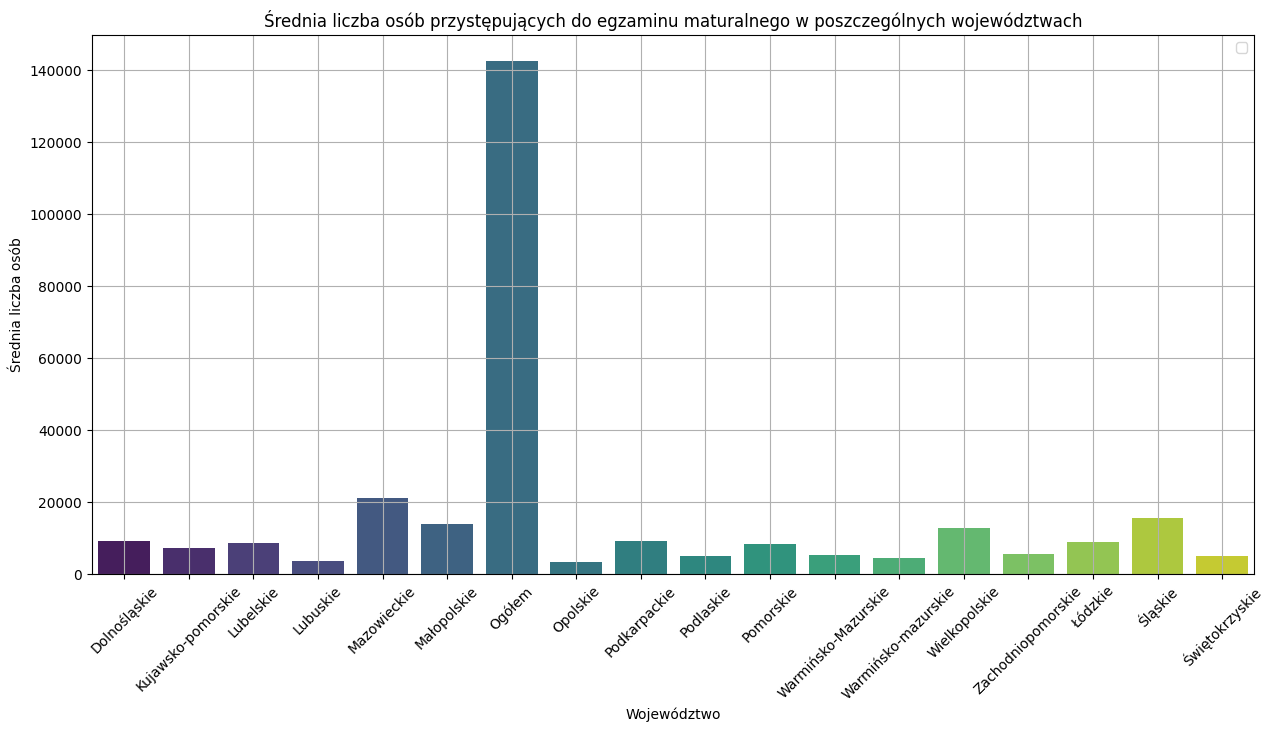

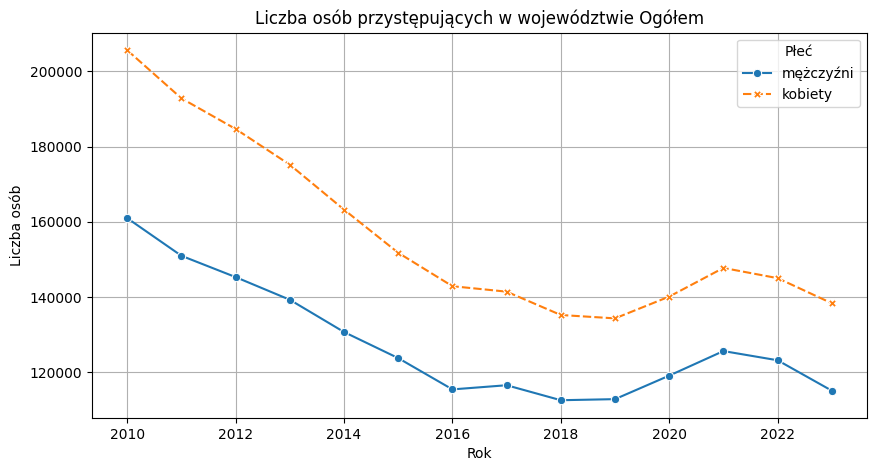

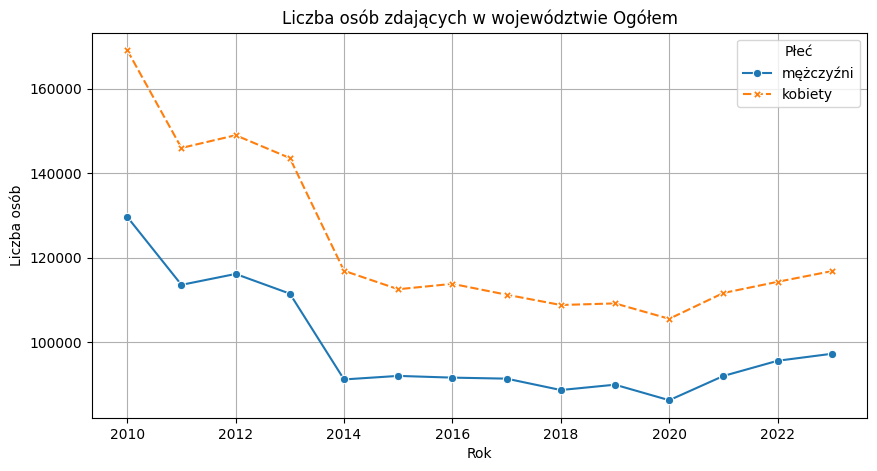

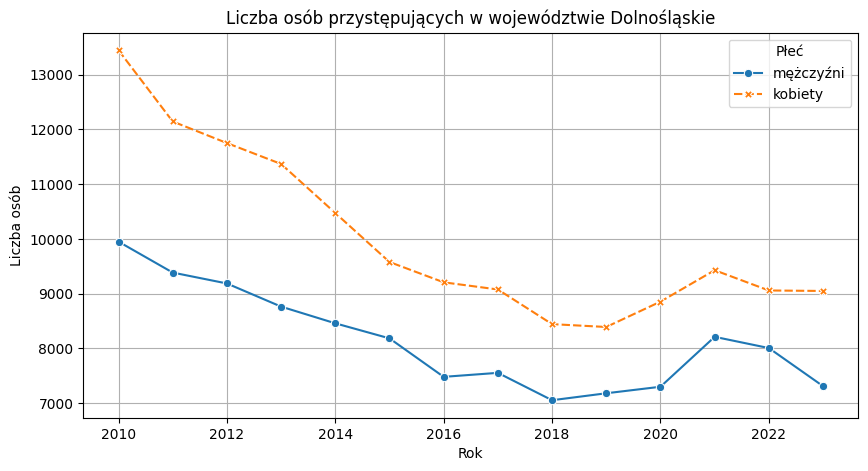

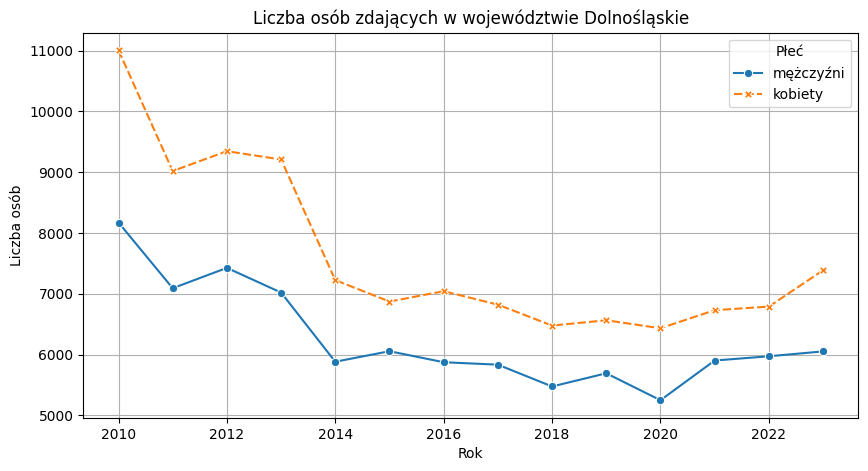

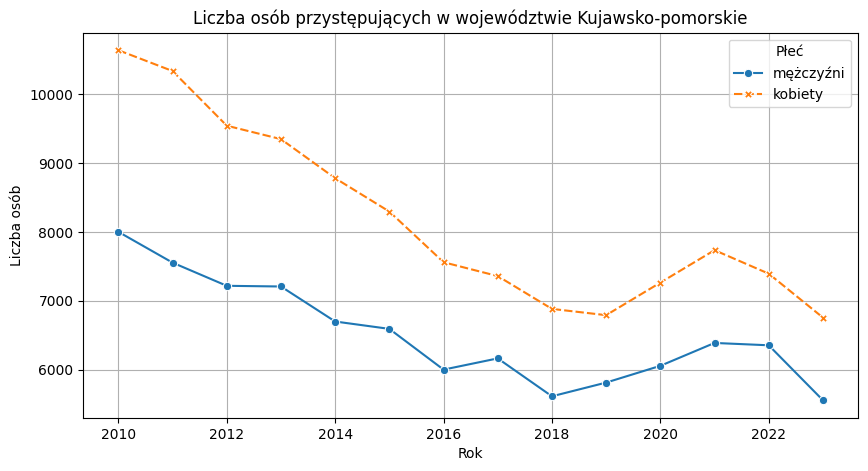

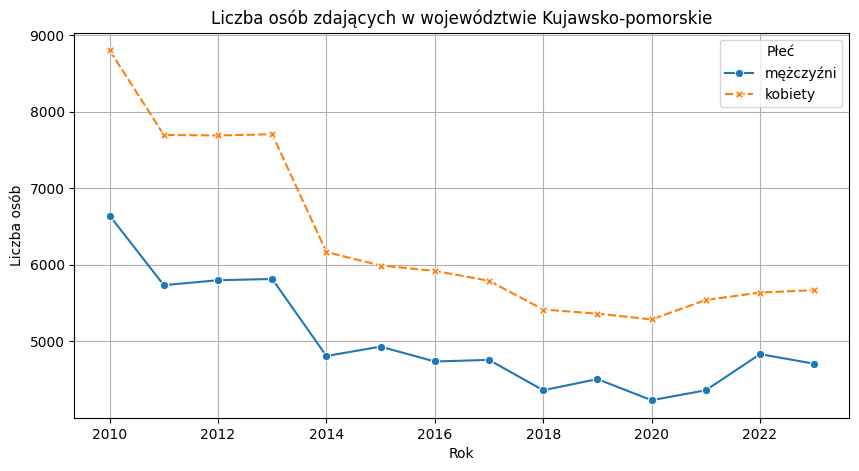

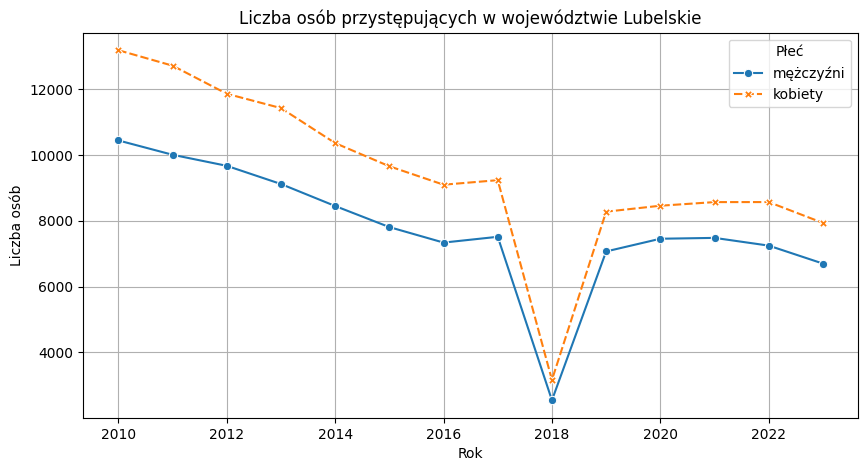

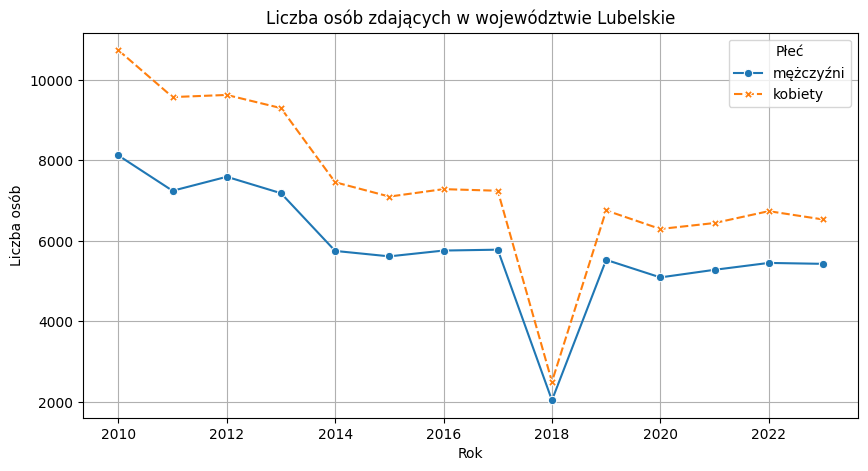

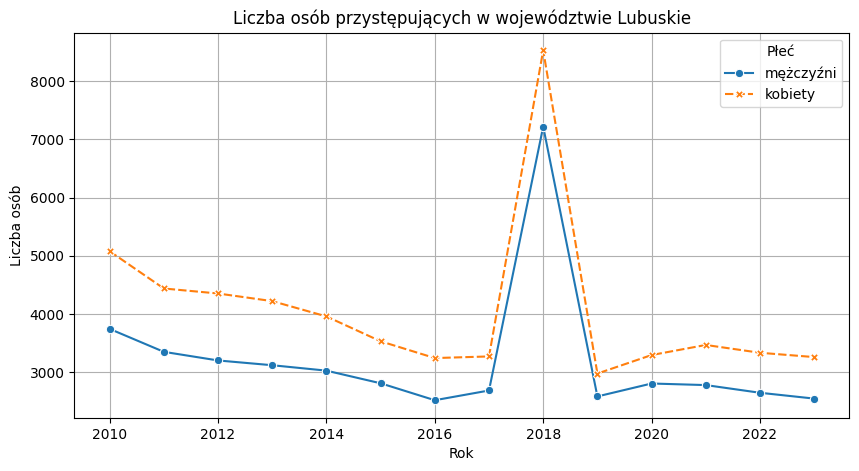

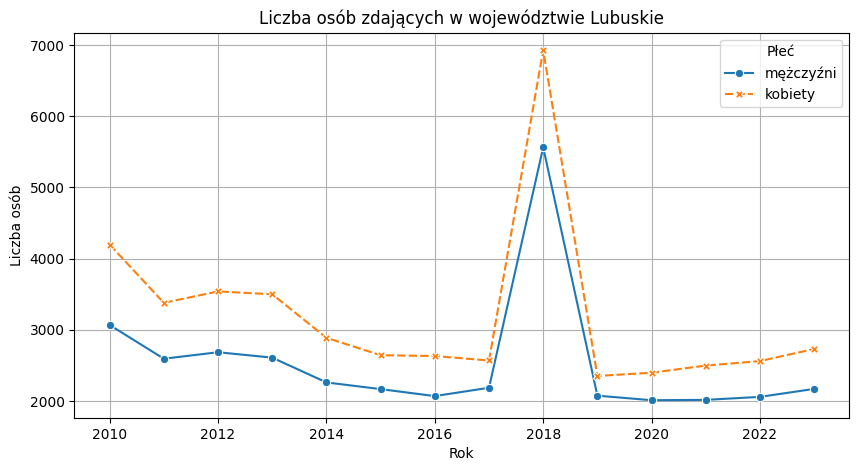

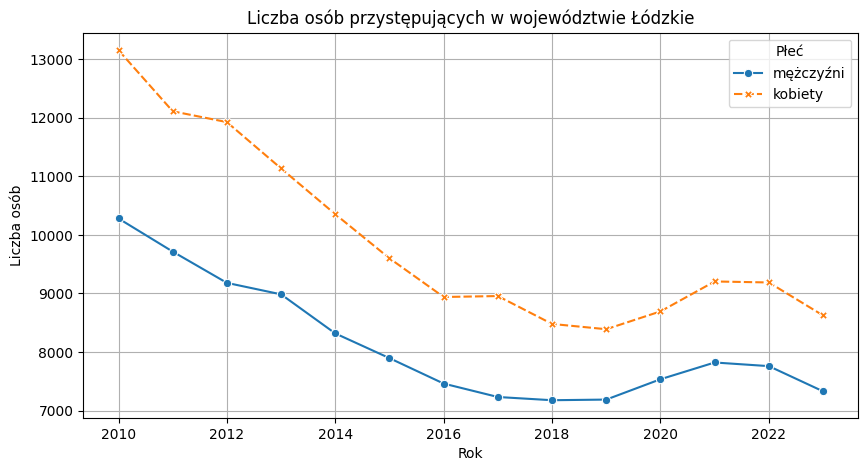

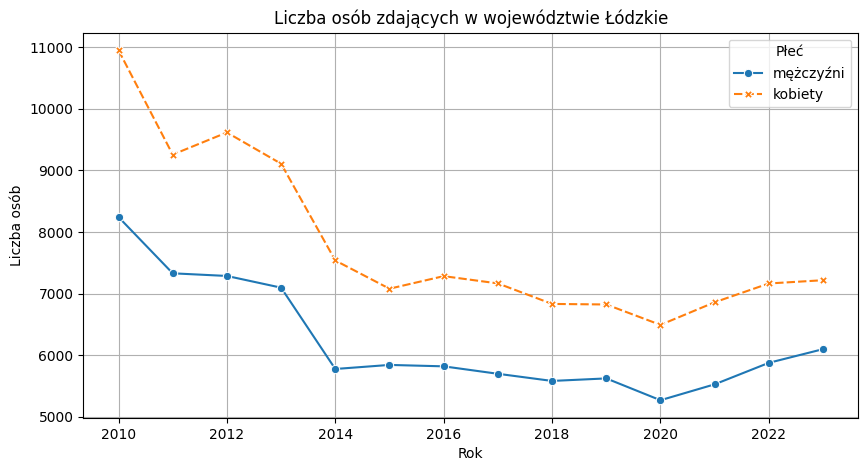

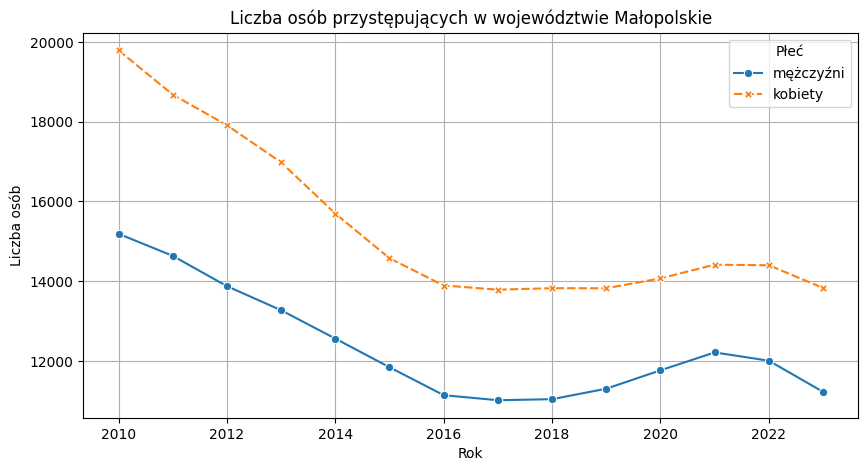

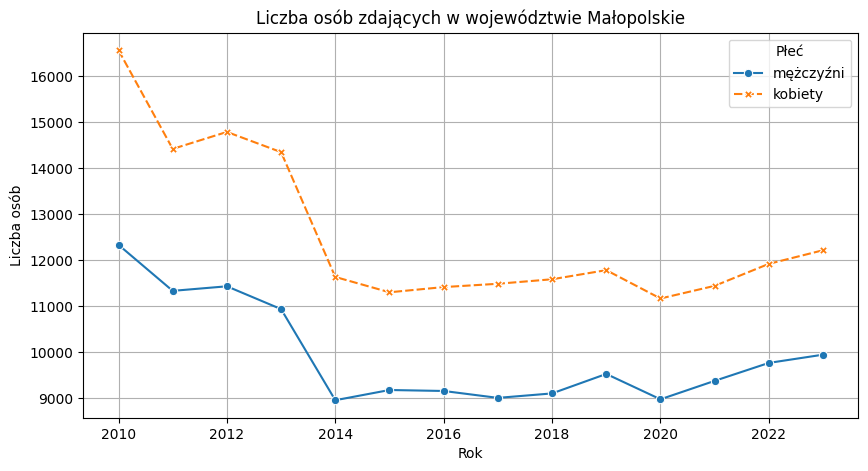

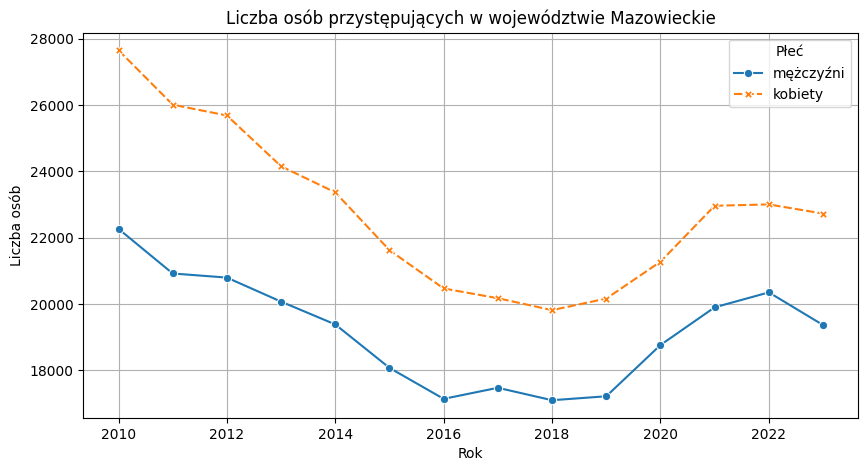

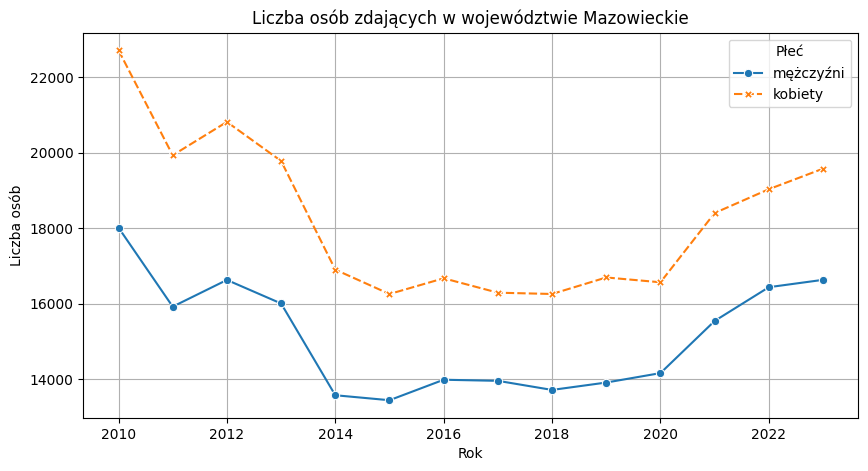

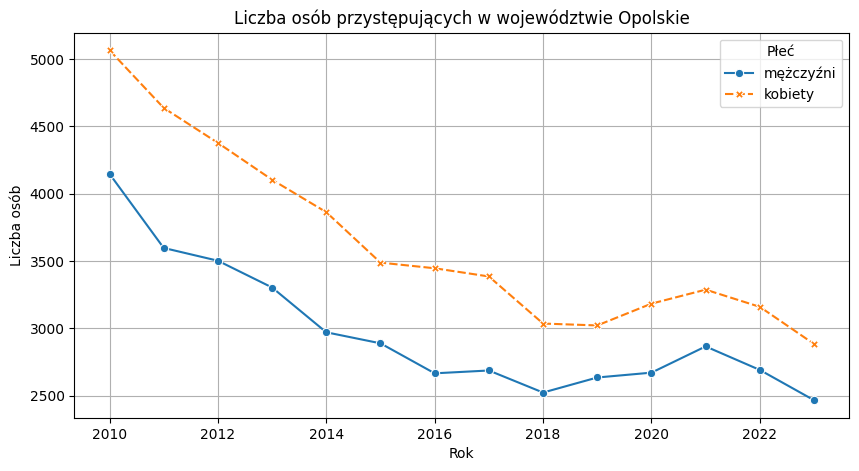

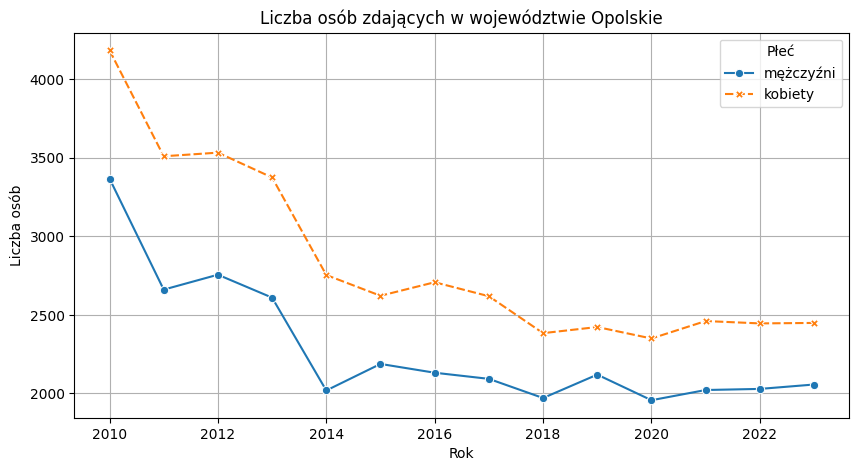

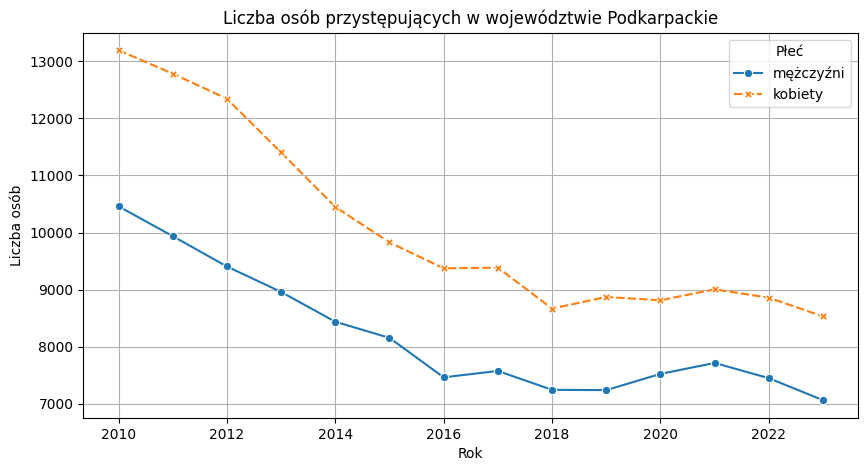

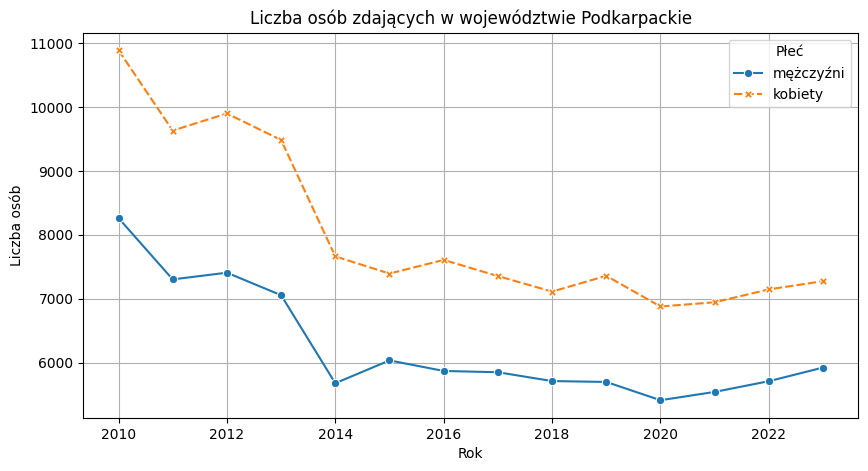

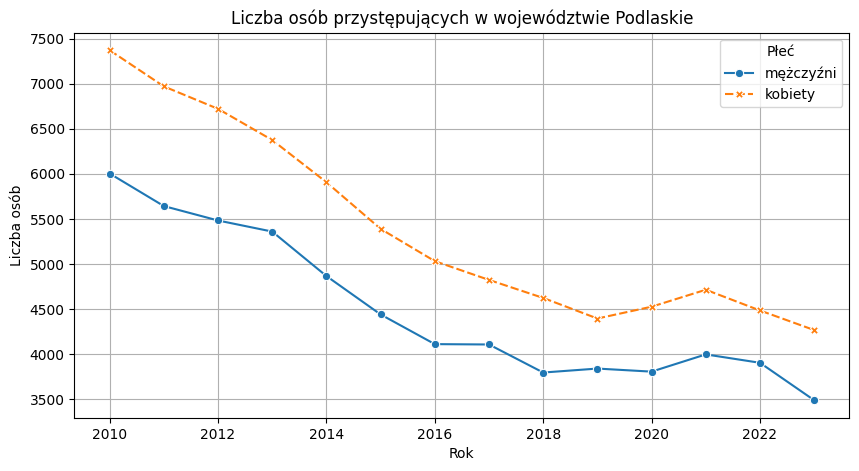

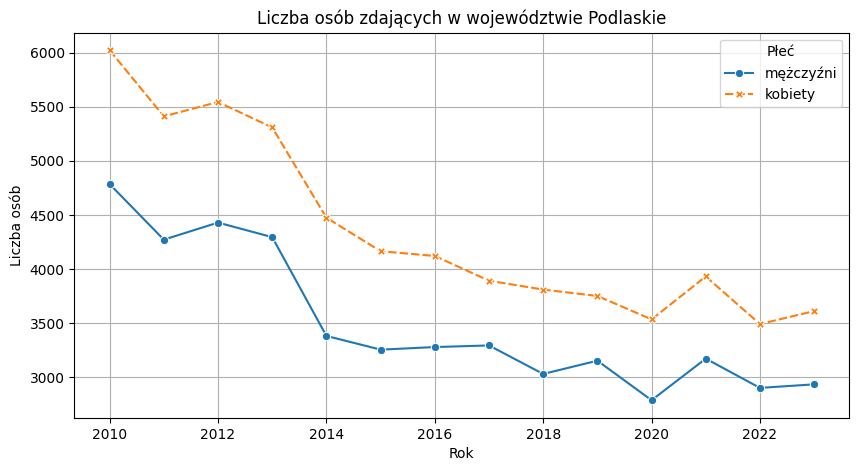

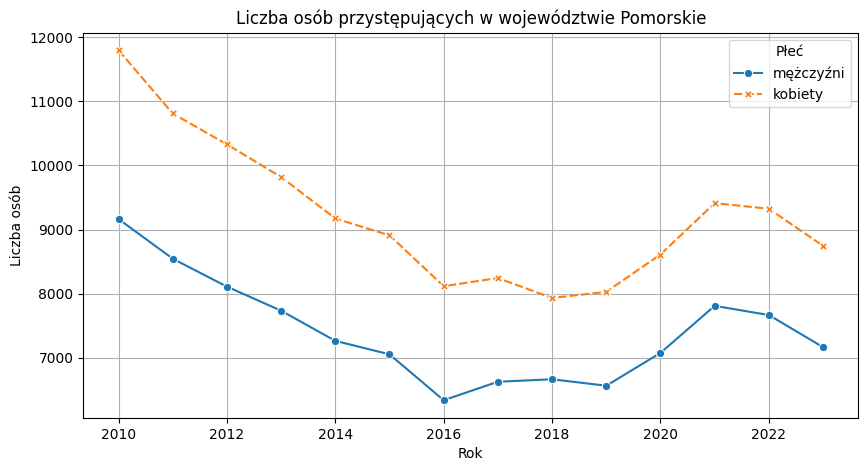

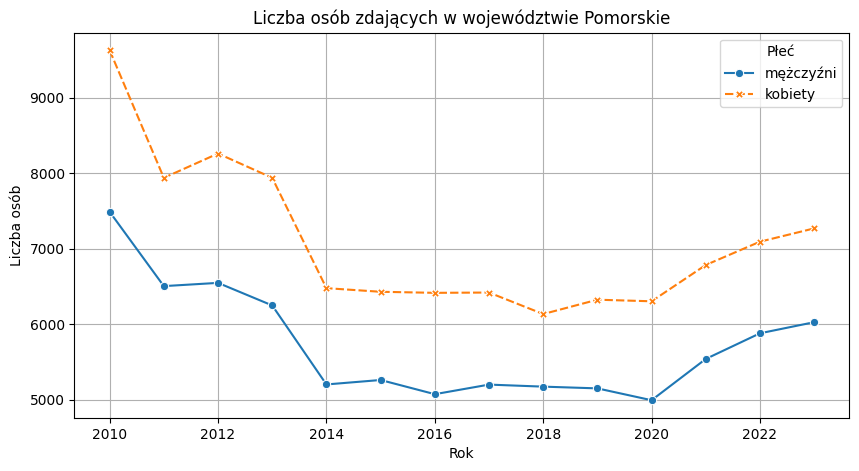

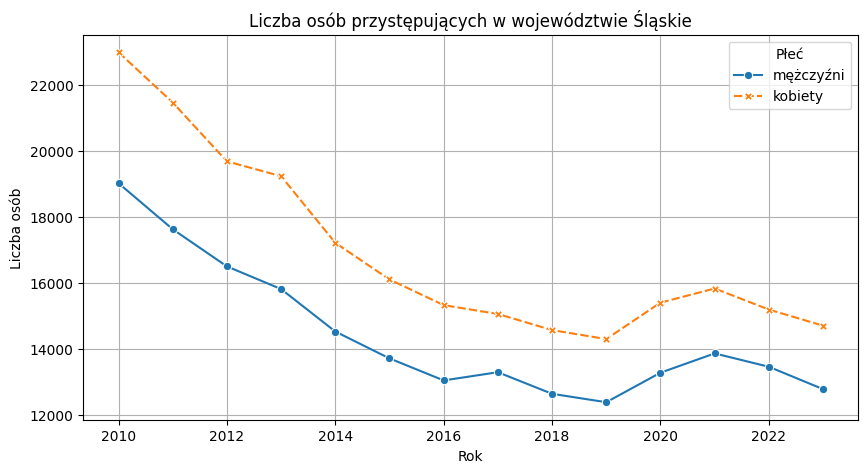

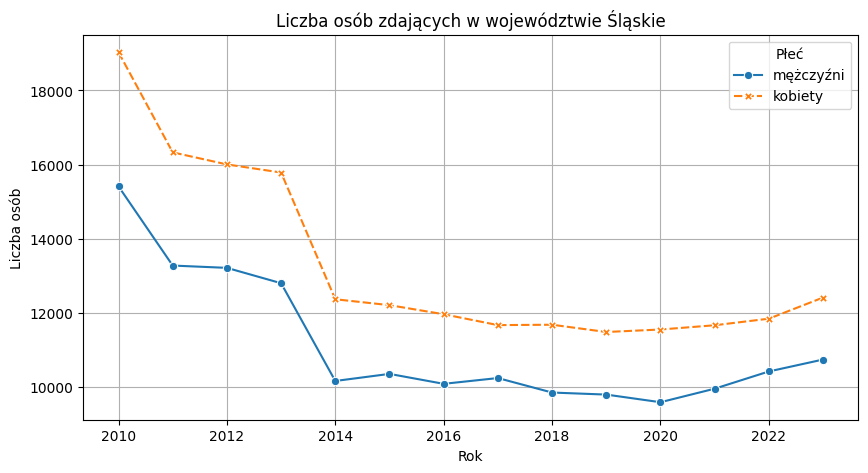

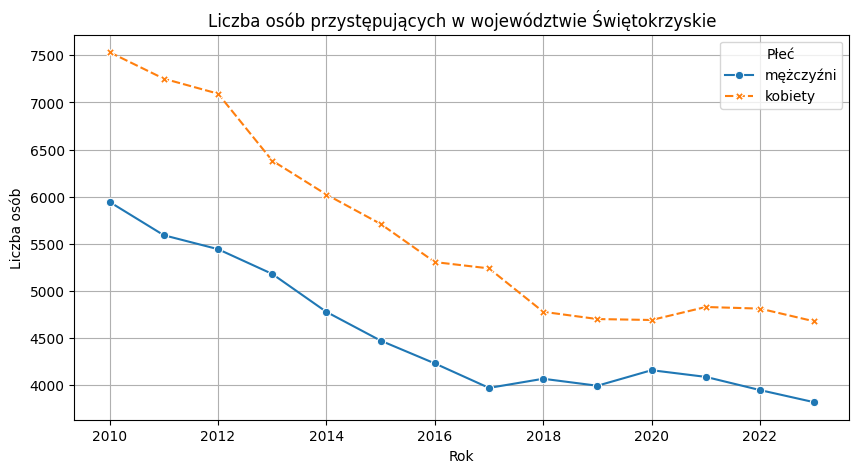

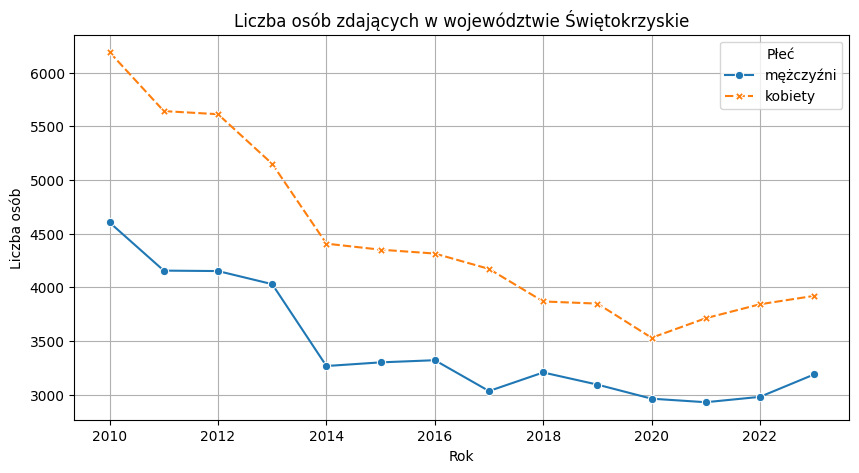

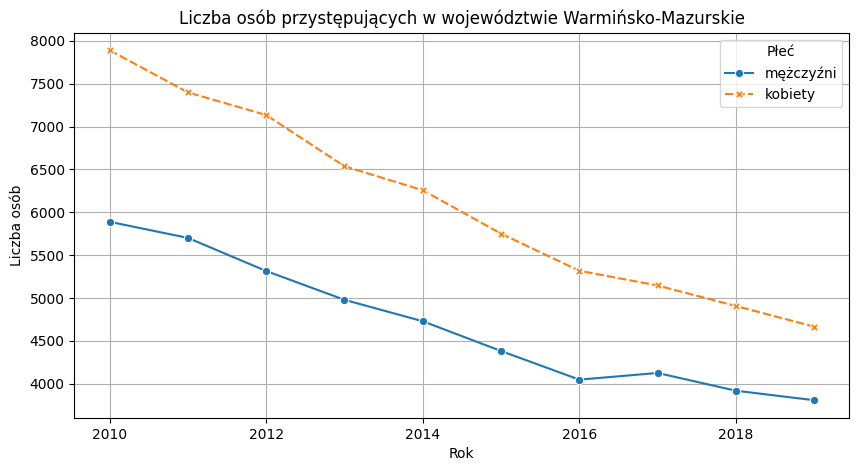

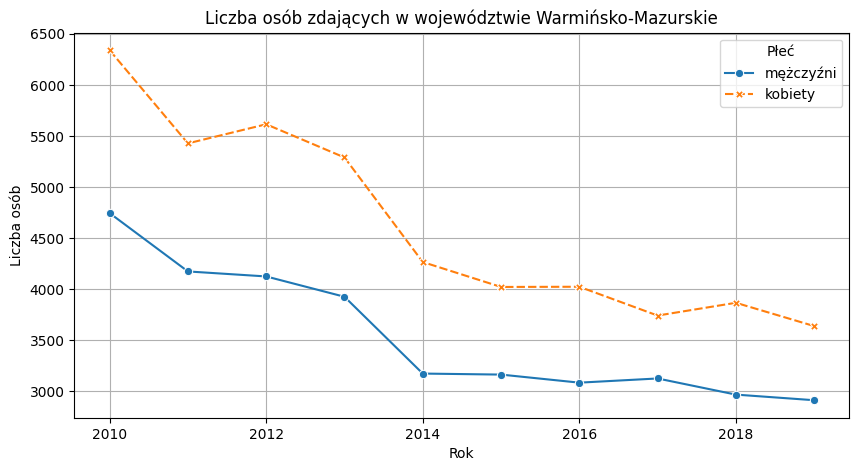

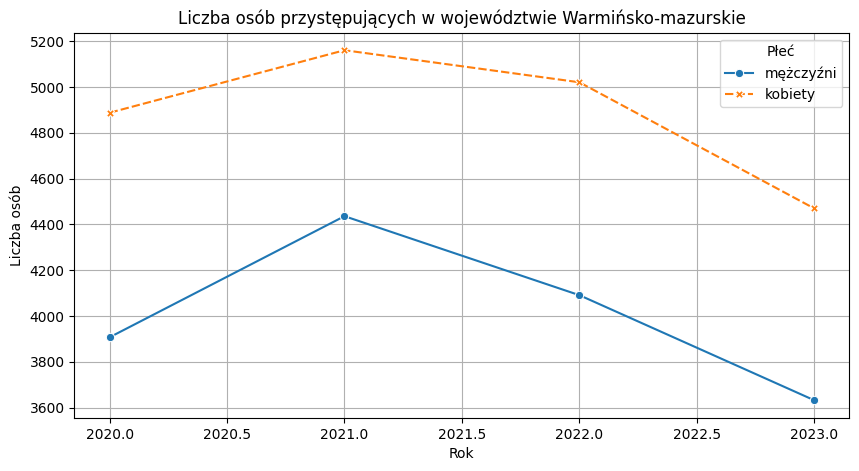

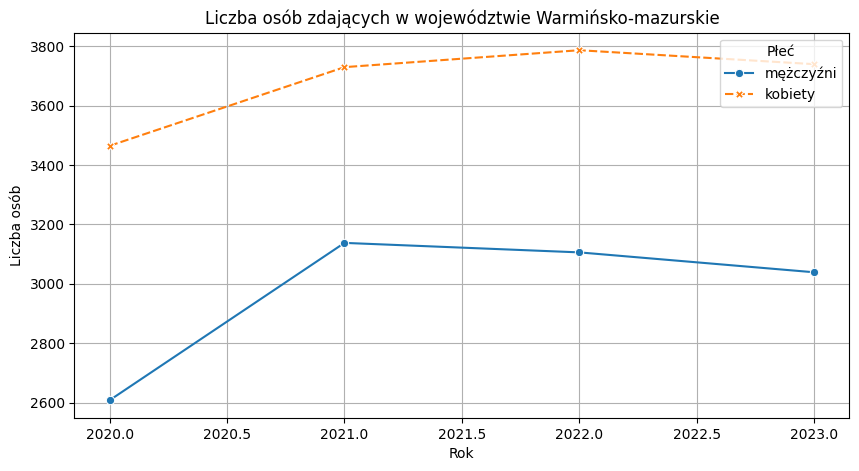

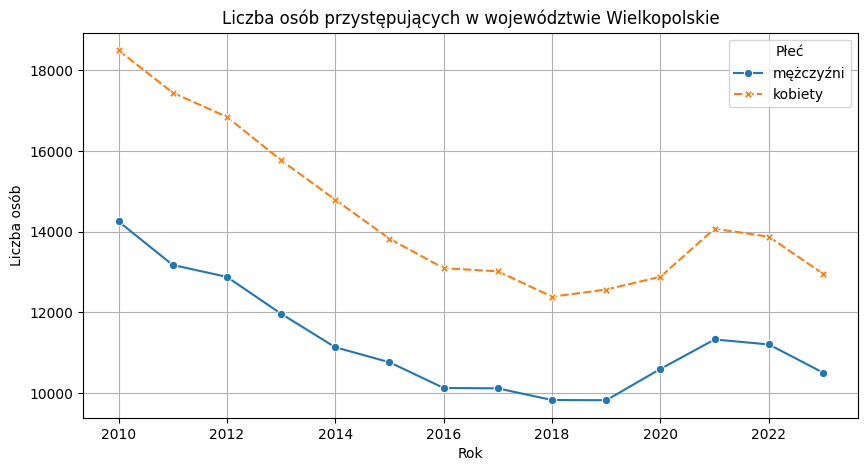

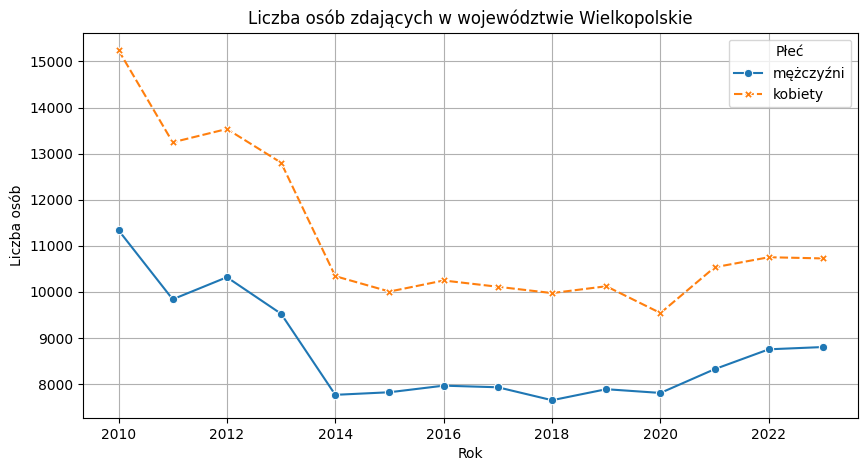

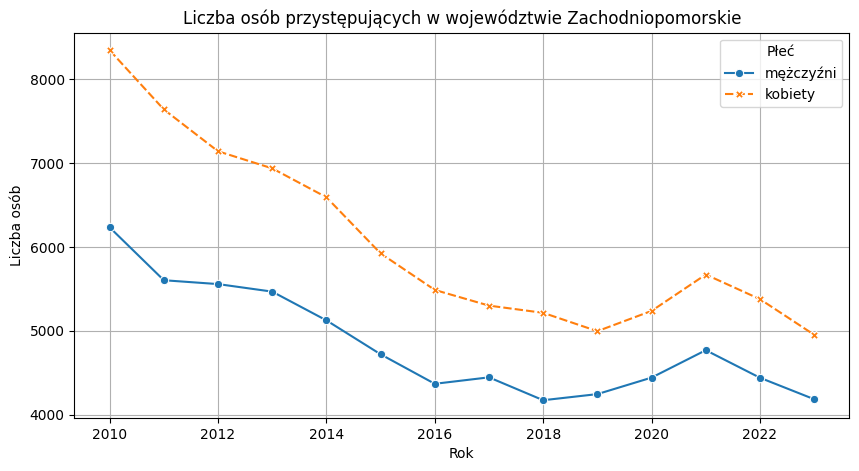

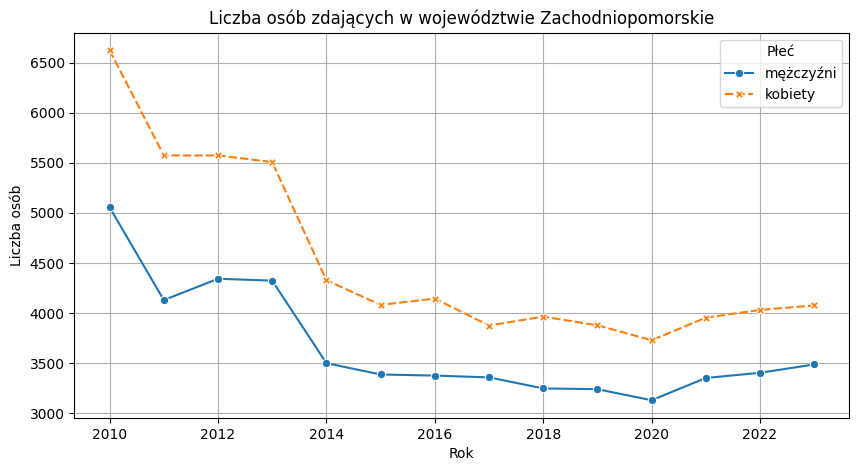

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Użycie surowego ciągu znaków (raw string) do ścieżki pliku CSV
file_path = r'C:\Users\janek\Documents\dopa\WebsiteProject\BAZA\dane.csv'

# Wczytanie pliku CSV z odpowiednim separatorem
data = pd.read_csv(file_path, sep=';')

# Konwersja kolumn do odpowiednich typów
data['wartosc'] = pd.to_numeric(data['wartosc'], errors='coerce')
data['rok'] = pd.to_numeric(data['rok'], errors='coerce')

# Usunięcie wierszy z brakującymi danymi
data = data.dropna(subset=['wartosc', 'rok'])

# Filtracja danych tylko dla przystępujących
przystepujacy = data[data['status_zdajacych'].str.contains('przystąpił', case=False, na=False)]

# Główny wykres: średnia liczba osób przystępujących do egzaminu w poszczególnych województwach
avg_values = przystepujacy.groupby('wojewodztwo')['wartosc'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(data=avg_values, x='wojewodztwo', y='wartosc', hue='wojewodztwo', palette='viridis', dodge=False)
plt.title('Średnia liczba osób przystępujących do egzaminu maturalnego w poszczególnych województwach')
plt.xlabel('Województwo')
plt.ylabel('Średnia liczba osób')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

# Tworzenie wykresów szczegółowych dla każdego województwa
wojewodztwa = data['wojewodztwo'].unique()

for wojewodztwo in wojewodztwa:
    # Dane dla wybranego województwa
    dane_wojewodztwo = data[data['wojewodztwo'] == wojewodztwo]

    # Wykres dla przystępujących ogółem, mężczyzn i kobiet
    przystepujacy_woj = dane_wojewodztwo[dane_wojewodztwo['status_zdajacych'].str.contains('przystąpił', case=False, na=False)]
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=przystepujacy_woj, x='rok', y='wartosc', hue='plec', style='plec', markers=True, palette='tab10')
    
    plt.title(f'Liczba osób przystępujących w województwie {wojewodztwo}')
    plt.xlabel('Rok')
    plt.ylabel('Liczba osób')
    plt.legend(title='Płeć', loc='upper right')
    plt.grid(True)
    plt.show()
    
    # Wykres dla zdających ogółem, mężczyzn i kobiet
    zdajacy_woj = dane_wojewodztwo[dane_wojewodztwo['status_zdajacych'].str.contains('zdał', case=False, na=False)]
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=zdajacy_woj, x='rok', y='wartosc', hue='plec', style='plec', markers=True, palette='tab10')
    
    plt.title(f'Liczba osób zdających w województwie {wojewodztwo}')
    plt.xlabel('Rok')
    plt.ylabel('Liczba osób')
    plt.legend(title='Płeć', loc='upper right')
    plt.grid(True)
    plt.show()
